<h2 align="center" style="color:LightkGray;"> <mark>Income Inequality Prediction</mark></h2>

<hr/>
<h3 align="center" style="background-color:white;color:OrangeRed;"> 🔌 Set-up 🔌</h3>
<hr/>


#### Importing Libraries

In [2]:
!pip install optuna

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from optuna.samplers import TPESampler

from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')
sns.color_palette("husl", 9)

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
Mounted at /content/drive


##### Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data/data.csv')
df.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [ ]:
df.shape

(209499, 43)

In [ ]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [ ]:
df.duplicated().sum()

0

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">There are no duplicate rows.</span>
</div>


In [ ]:
df.describe().T

count         mean          std    min      25%  \
age                    209499.0    34.518728    22.306738   0.00    15.00   
employment_stat        209499.0     0.176760     0.555562   0.00     0.00   
wage_per_hour          209499.0    55.433487   276.757327   0.00     0.00   
working_week_per_year  209499.0    23.158850    24.397963   0.00     0.00   
industry_code          209499.0    15.332398    18.049655   0.00     0.00   
occupation_code        209499.0    11.321734    14.460839   0.00     0.00   
total_employed         209499.0     1.956067     2.365154   0.00     0.00   
vet_benefit            209499.0     1.515854     0.850853   0.00     2.00   
gains                  209499.0   435.926887  4696.359500   0.00     0.00   
losses                 209499.0    36.881737   270.383302   0.00     0.00   
stocks_status          209499.0   194.533420  1956.375501   0.00     0.00   
mig_year               209499.0    94.499745     0.500001  94.00    94.00   
importance_of_record   209499.0  1740.888324   995.559557  37.87  1061.29   

                           50%      75%      max  
age                      33.00    50.00     90.0  
employment_stat           0.00     0.00      2.0  
wage_per_hour             0.00     0.00   9999.0  
working_week_per_year     8.00    52.00     52.0  
industry_code             0.00    33.00     51.0  
occupation_code           0.00    26.00     46.0  
total_employed            1.00     4.00      6.0  
vet_benefit               2.00     2.00      2.0  
gains                     0.00     0.00  99999.0  
losses                    0.00     0.00   4608.0  
stocks_status             0.00     0.00  99999.0  
mig_year                 94.00    95.00     95.0  
importance_of_record   1617.04  2185.48  18656.3

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['mean', 'std'], ['std', 'min'], ['min', '25%'], ['25%', '50%']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['count', 'mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['count', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['count', 'min', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['count', '25%', None], **{})
chart

<hr/>
<h3 align="center" style="background-color:white; color:Navy;"> 🔬 EDA 🔬</h3>
<hr/>

* Lets check for some random keywords used instead of correct values

In [ ]:
for col in df.columns:
  print(col," => ",df[col].unique())

ID  =>  ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
age  =>  [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]
gender  =>  [' Female' ' Male']
education  =>  [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
class  =>  [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not inc

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;"><br/><b>some values from dataset</b>
<span style="color: #333333; font-size:95%;"><br/><br/> is_hispanic  =>  [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano']<br/><br/>

migration_prev_sunbelt  =>  [' ?' nan ' No' 'Same']<br/><br/>

 '**Do not know**' ,'**NA**' and '**?**' are some values which can be replaced by null.</span>
</div>


In [ ]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
nulls = [' NA',' Do not know', ' ?']

df.replace(nulls, np.nan, inplace = True)
df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                         1187
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
matches = df['ID'].isin(df['ID'])

In [ ]:
len(df['ID'].unique())


209499

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">Eventhough index numbers and ID numbers differs by numbers, when we see the unique count equal to the number of row, it means that all IDs are unique and can be aborted.</span></div>

In [ ]:
df.drop(['ID'],axis=1,inplace=True)
df.shape

(209499, 42)

* Lets check the columns that contains null values

In [ ]:
def print_null(dft):
    for col in dft.columns:
        if(dft[col].isnull().sum()!=0):
            print(col,' => ',dft[col].isnull().sum())

print_null(df)

class  =>  105245
education_institute  =>  196197
is_hispanic  =>  1187
unemployment_reason  =>  202979
is_labor_union  =>  189420
occupation_code_main  =>  105694
under_18_family  =>  151654
veterans_admin_questionnaire  =>  207415
country_of_birth_own  =>  3667
country_of_birth_father  =>  7181
country_of_birth_mother  =>  6516
migration_code_change_in_msa  =>  106284
migration_prev_sunbelt  =>  193148
migration_code_move_within_reg  =>  106284
migration_code_change_in_reg  =>  106284
residence_1_year_ago  =>  106284
old_residence_reg  =>  193148
old_residence_state  =>  193889


* Checking columns having more than 50% of null values

In [ ]:
colnames = df.isna().sum()/len(df)
highnull_cols = list(colnames[colnames.values>=0.5].index)
print(highnull_cols)

['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


* lets plot the null values in data

<Axes: >

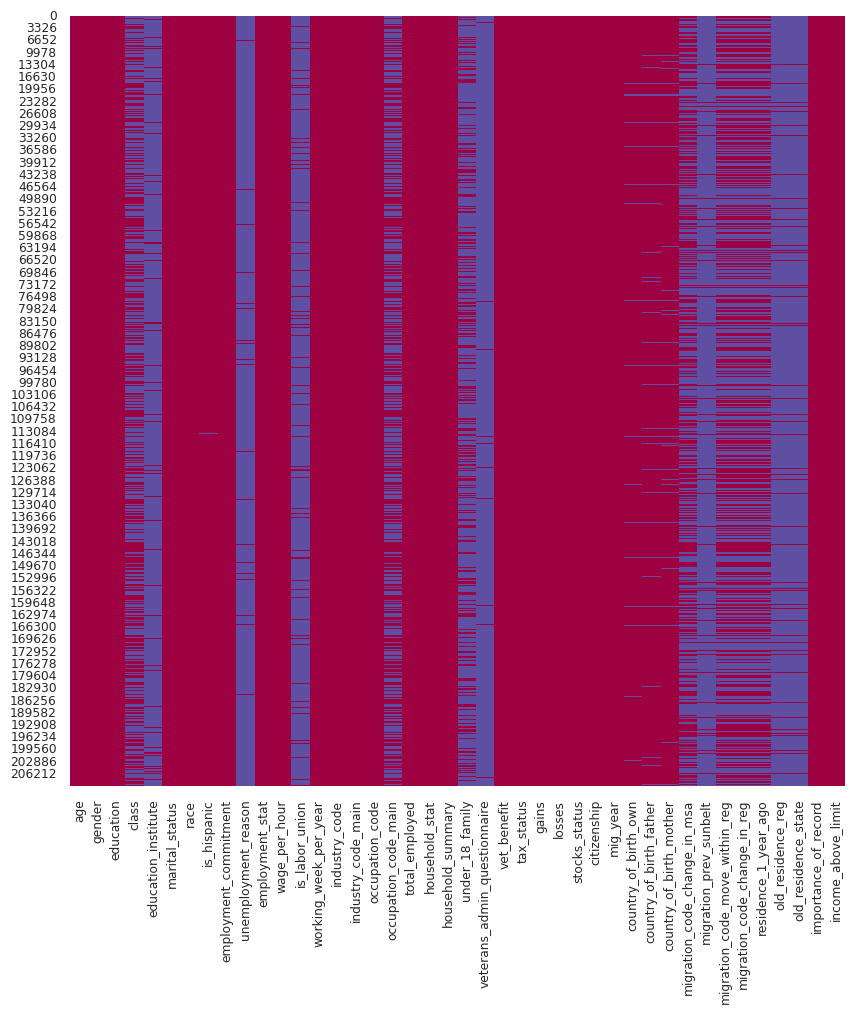

In [ ]:
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='Spectral', fmt=".1f")

##### correlation before pre-processing

<Axes: >

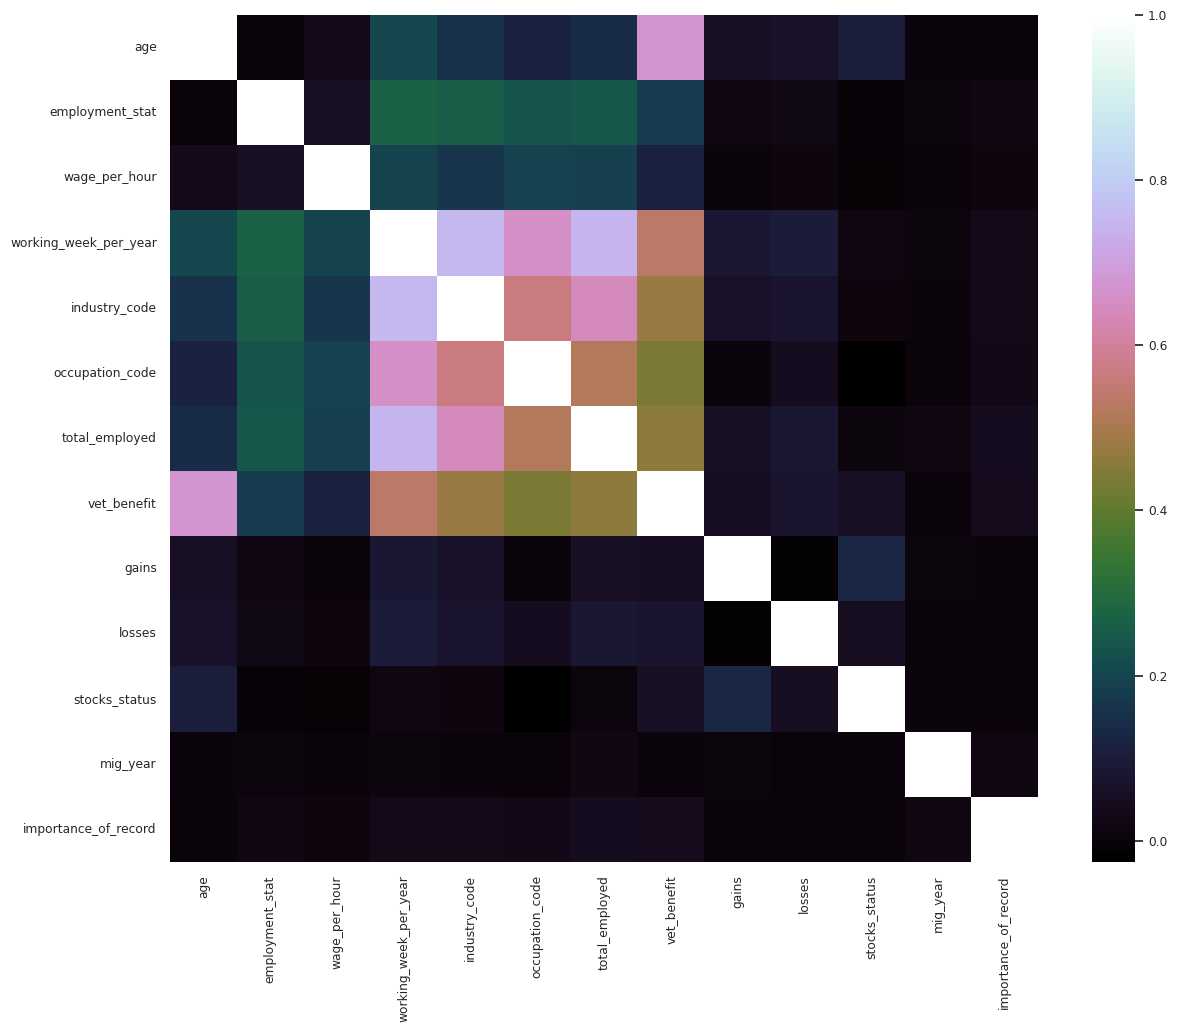

In [ ]:
plt.figure(figsize=(14,11))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=False, cmap = 'cubehelix')

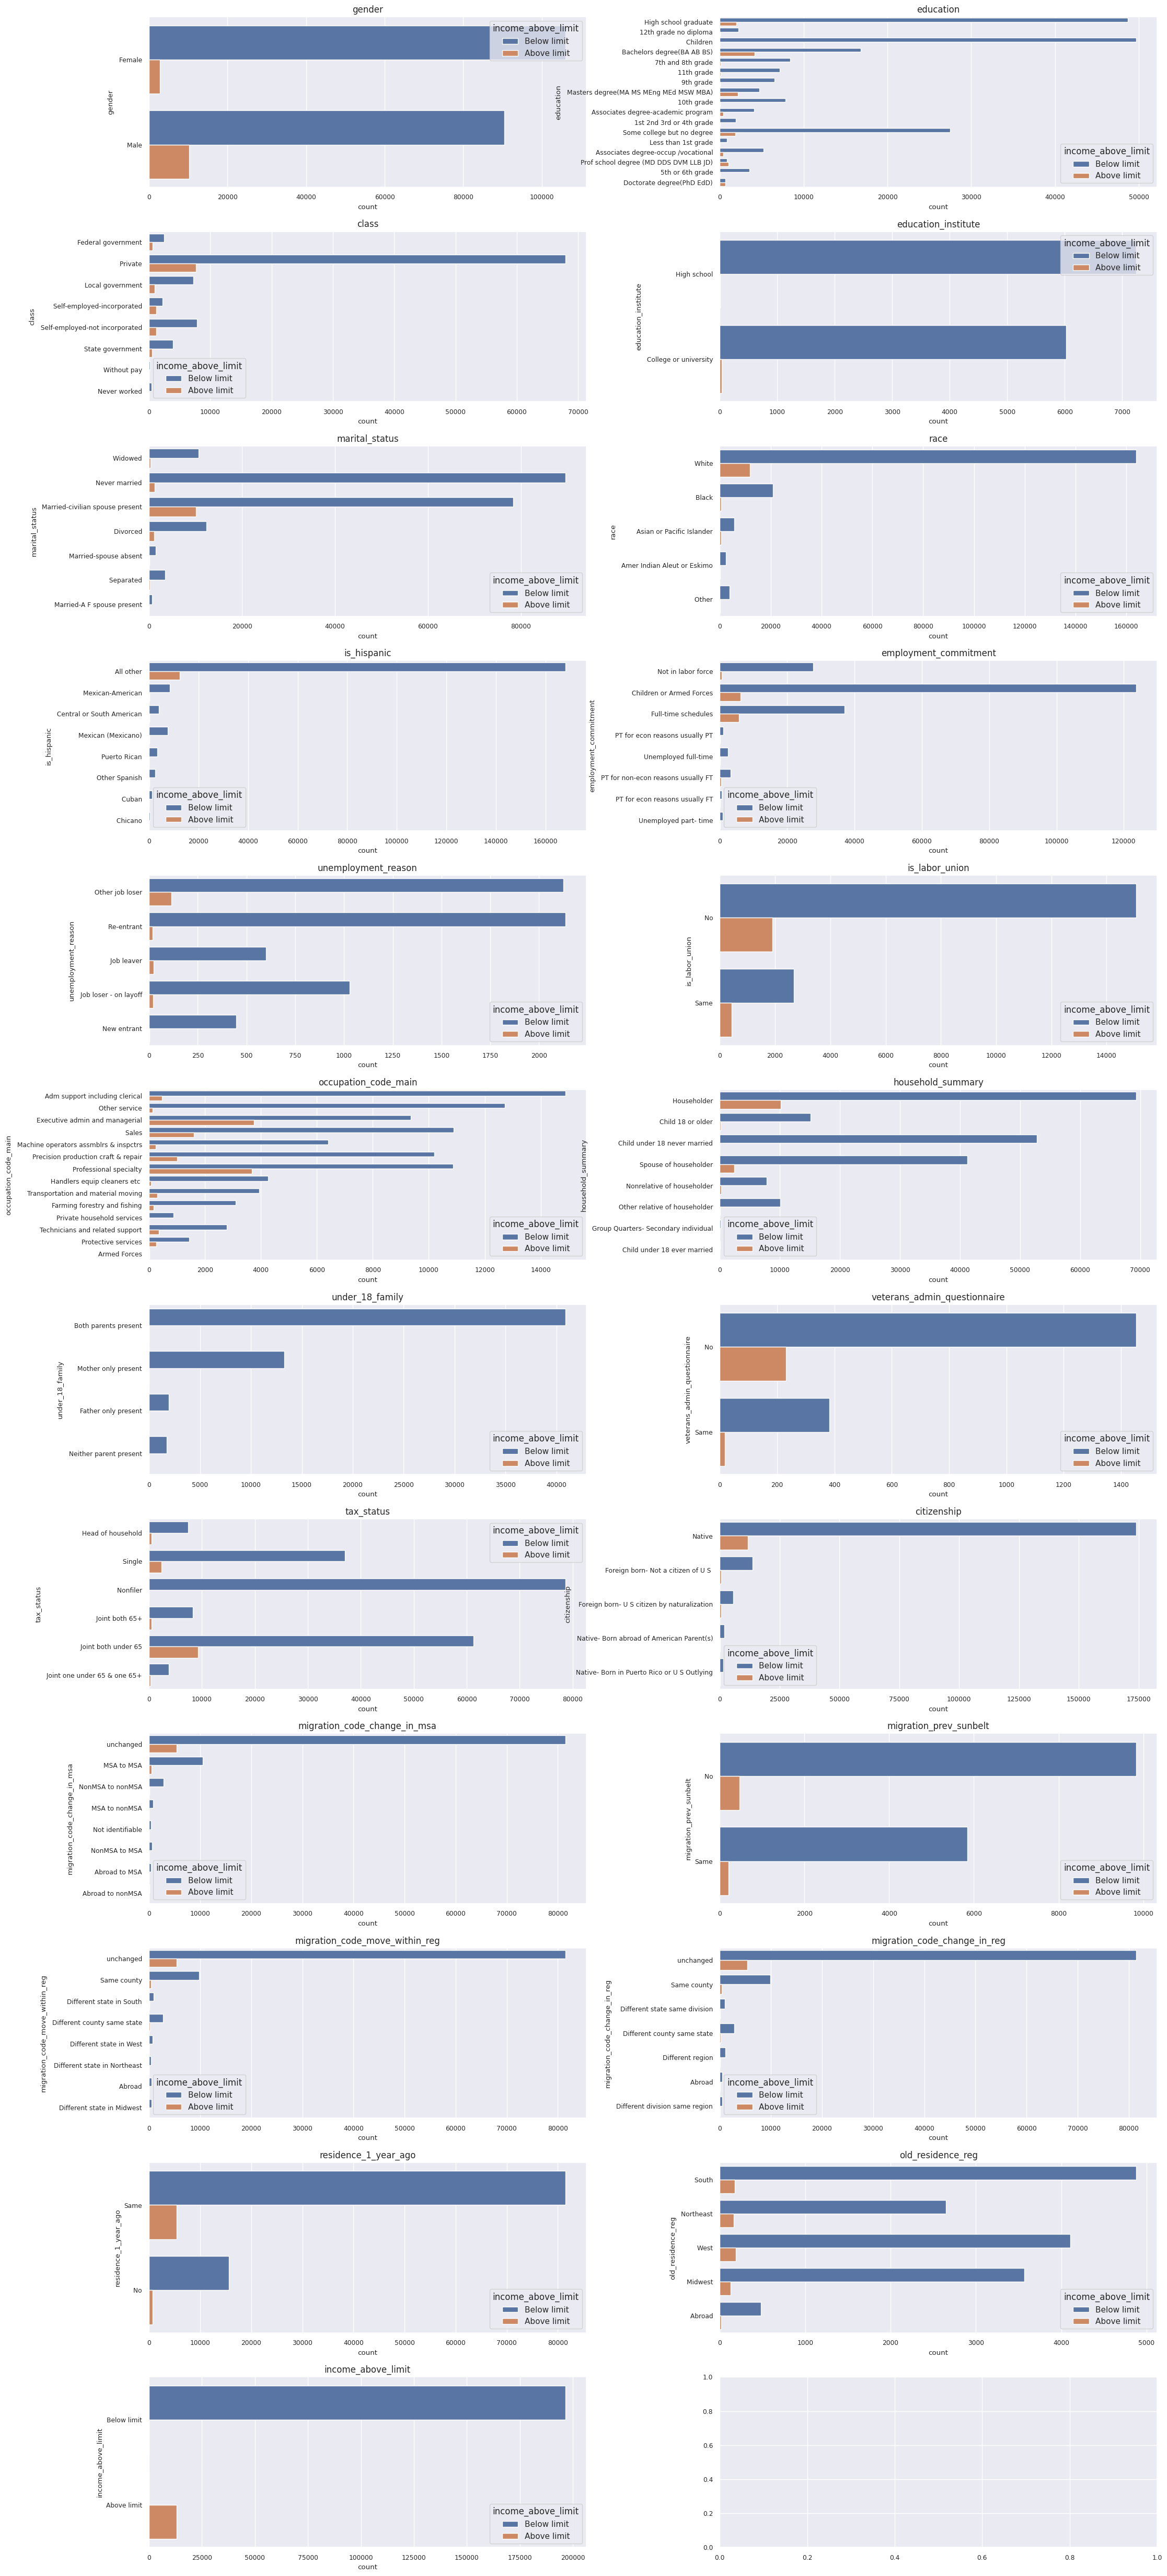

In [ ]:
i=0
fig, axs = plt.subplots(nrows=12, ncols=2,figsize=(20,49))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='object'):
  if df[column].nunique() < 20:
    axs[i//2,i%2].set_title(column)
    sns.countplot(y=column, data=df,hue="income_above_limit",ax=axs[i//2,i%2])
    i=i+1
plt.show()

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;"><br/><b> General Observations</b><br/><ul style="list-style-type:square">
<li>Males have more above limit income as compared to females.</li>
<li>To have a good income, mostly high school graduates, degrees or degree programs are required.</li>
<li>Education institute also supports the same observation as above.</li>
<li>The private class has more job opportunities and a good income comparatively.</li>
<li>Married Candidates with their other halfs strive for higher income.</li>
<li>Unchanged migration code both moving and changing in reg helps increase income above the limit.</li>
</span></div>

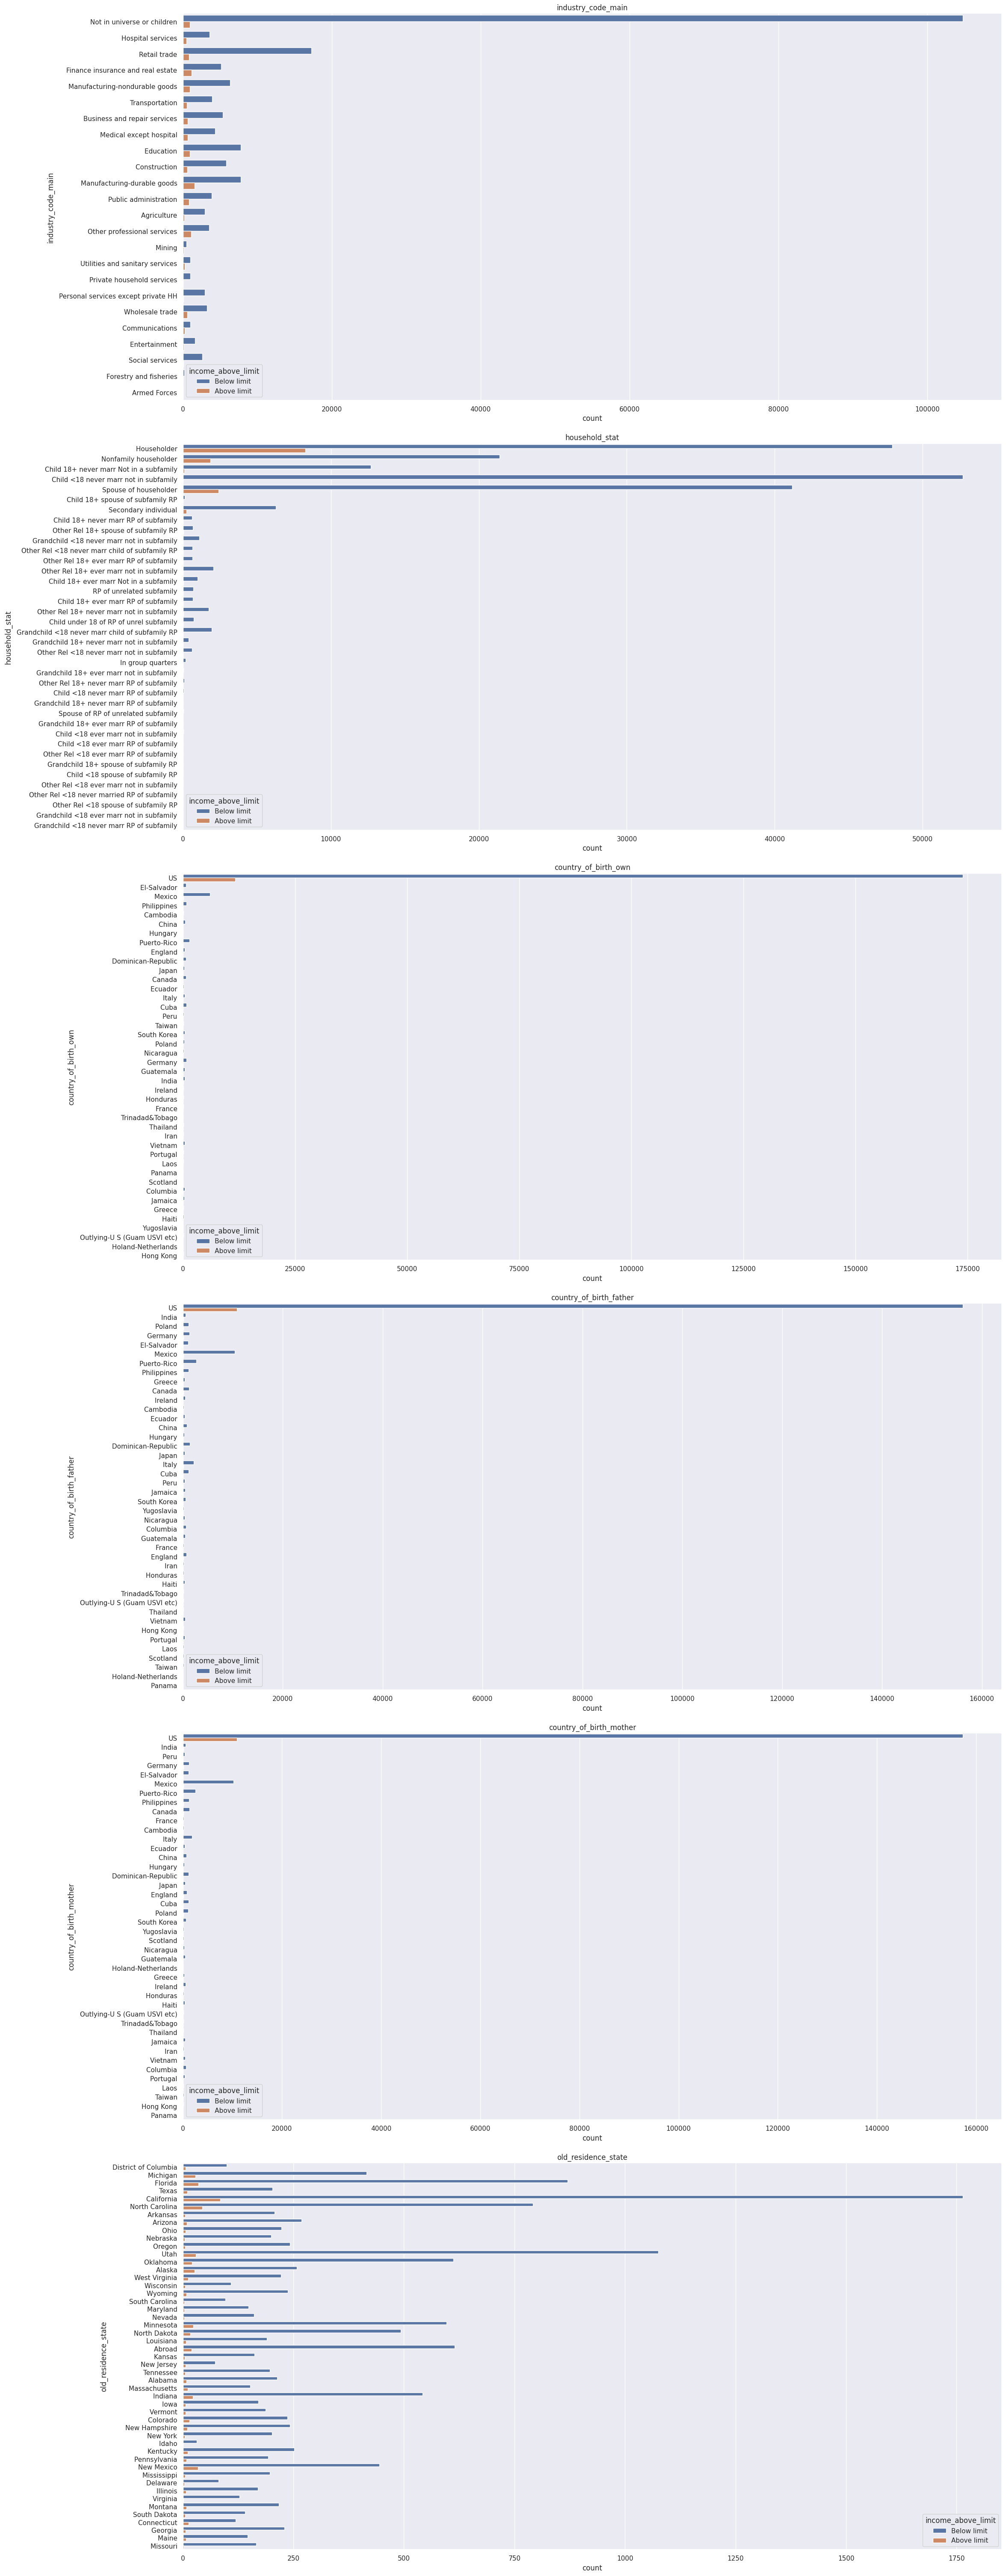

In [ ]:
i=0
fig, axs = plt.subplots(nrows=6, ncols=1,figsize=(20,60))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='object'):
  if df[column].nunique() >= 20:
    axs[i].set_title(column)
    sns.countplot(y=column, data=df,hue="income_above_limit",ax=axs[i])
    i=i+1
plt.show()

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;"><br/><b> General Observations</b><br/><ul style="list-style-type:square">
<li> Funny fact is :- Either mother, father or candidate's birth country is US or be a White for high income benefit.</li>
<li> California, Utah, Florida & North Carolina has the most job opportunities</li></span></div>

* plotting for numerical variables

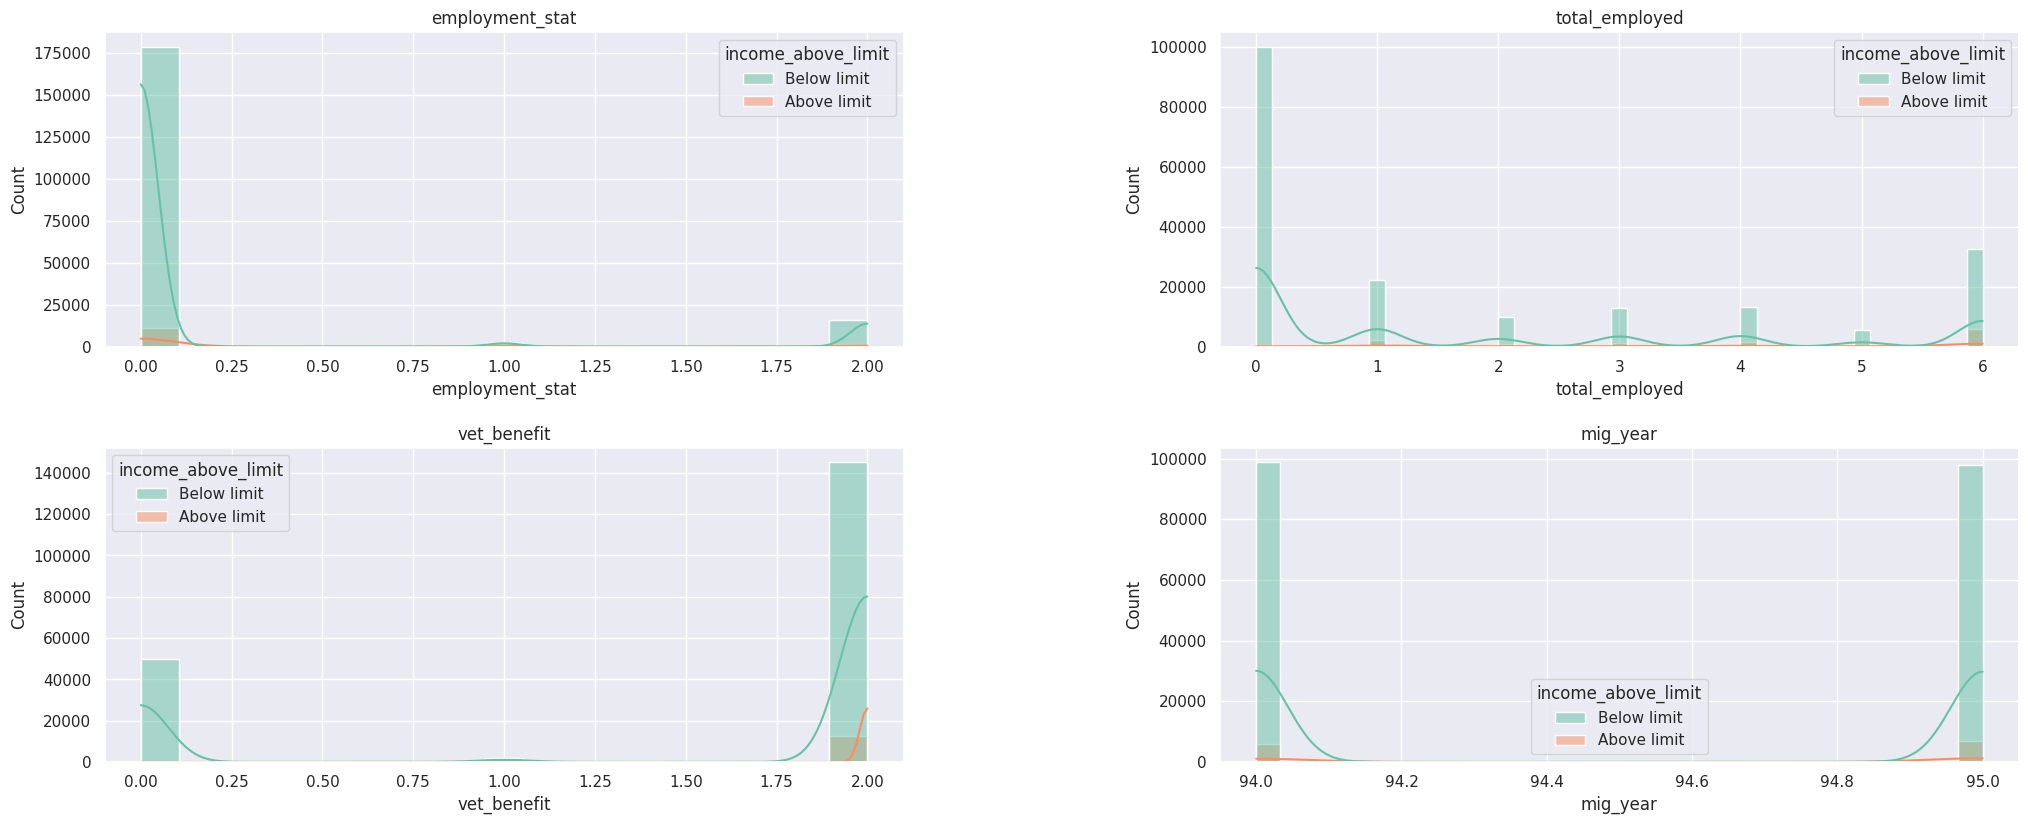

In [ ]:
i=0
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20,8))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='int64'):
  if df[column].nunique() < 20:
    axs[i//2,i%2].set_title(column)
    sns.histplot(x=column, data=df,ax=axs[i//2,i%2], hue="income_above_limit", palette='Set2',kde=True)
    i=i+1
plt.show()

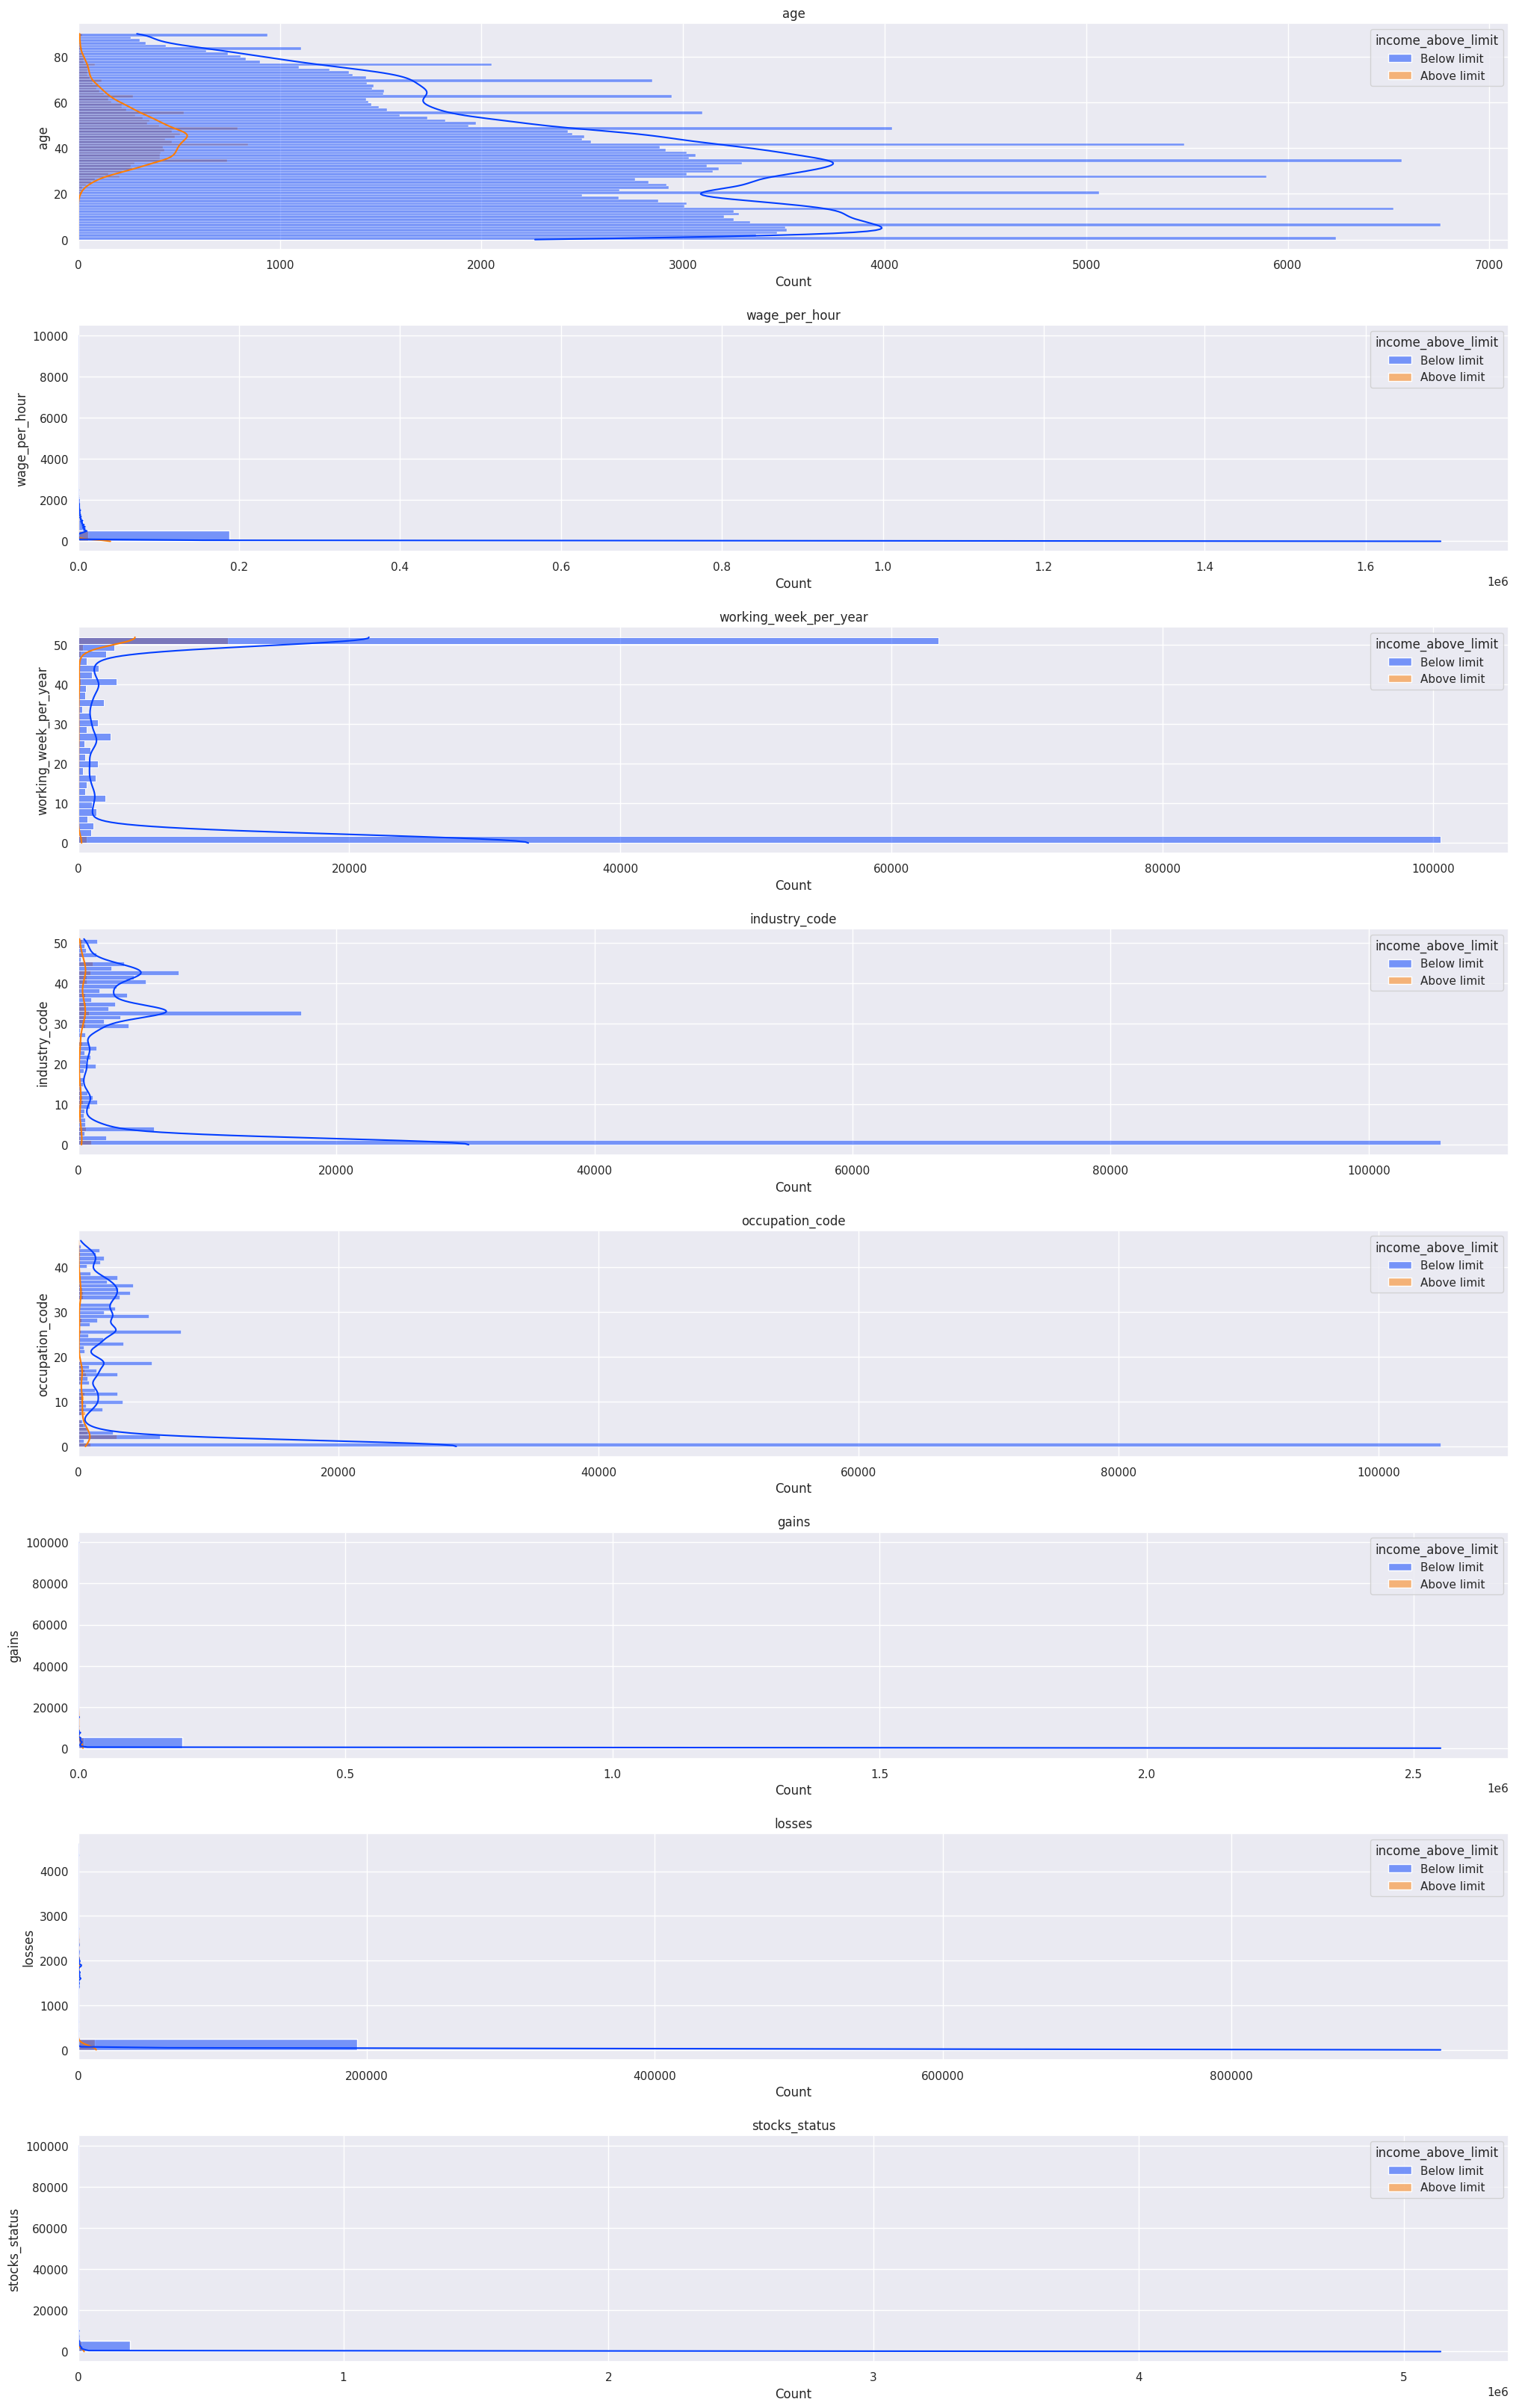

In [ ]:
i=0
fig, axs = plt.subplots(nrows=8, ncols=1,figsize=(20,32))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df.select_dtypes(include='int64'):
  if df[column].nunique() >= 20:
    axs[i].set_title(column)
    sns.histplot(y=column, data=df,ax=axs[i], hue="income_above_limit", palette='bright', kde=True)
    i=i+1
plt.show()

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;"><br/><b> General Observations</b><br/><ul style="list-style-type:square">
<li> Eventhough the <b>income</b> and <b>income above limit</b> increases with increase in age, as soon as old age starts <b>income above limit</b> can be seen to be reducing to 0 gradually.</span></div>


<Axes: xlabel='importance_of_record', ylabel='Count'>

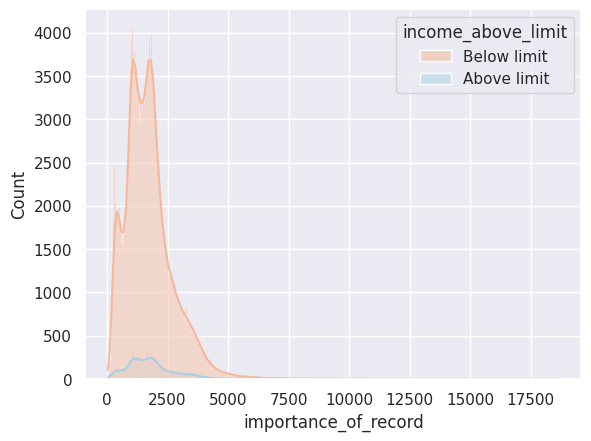

In [ ]:

sns.histplot(x="importance_of_record", data=df, hue="income_above_limit", kde=True, palette='RdBu')

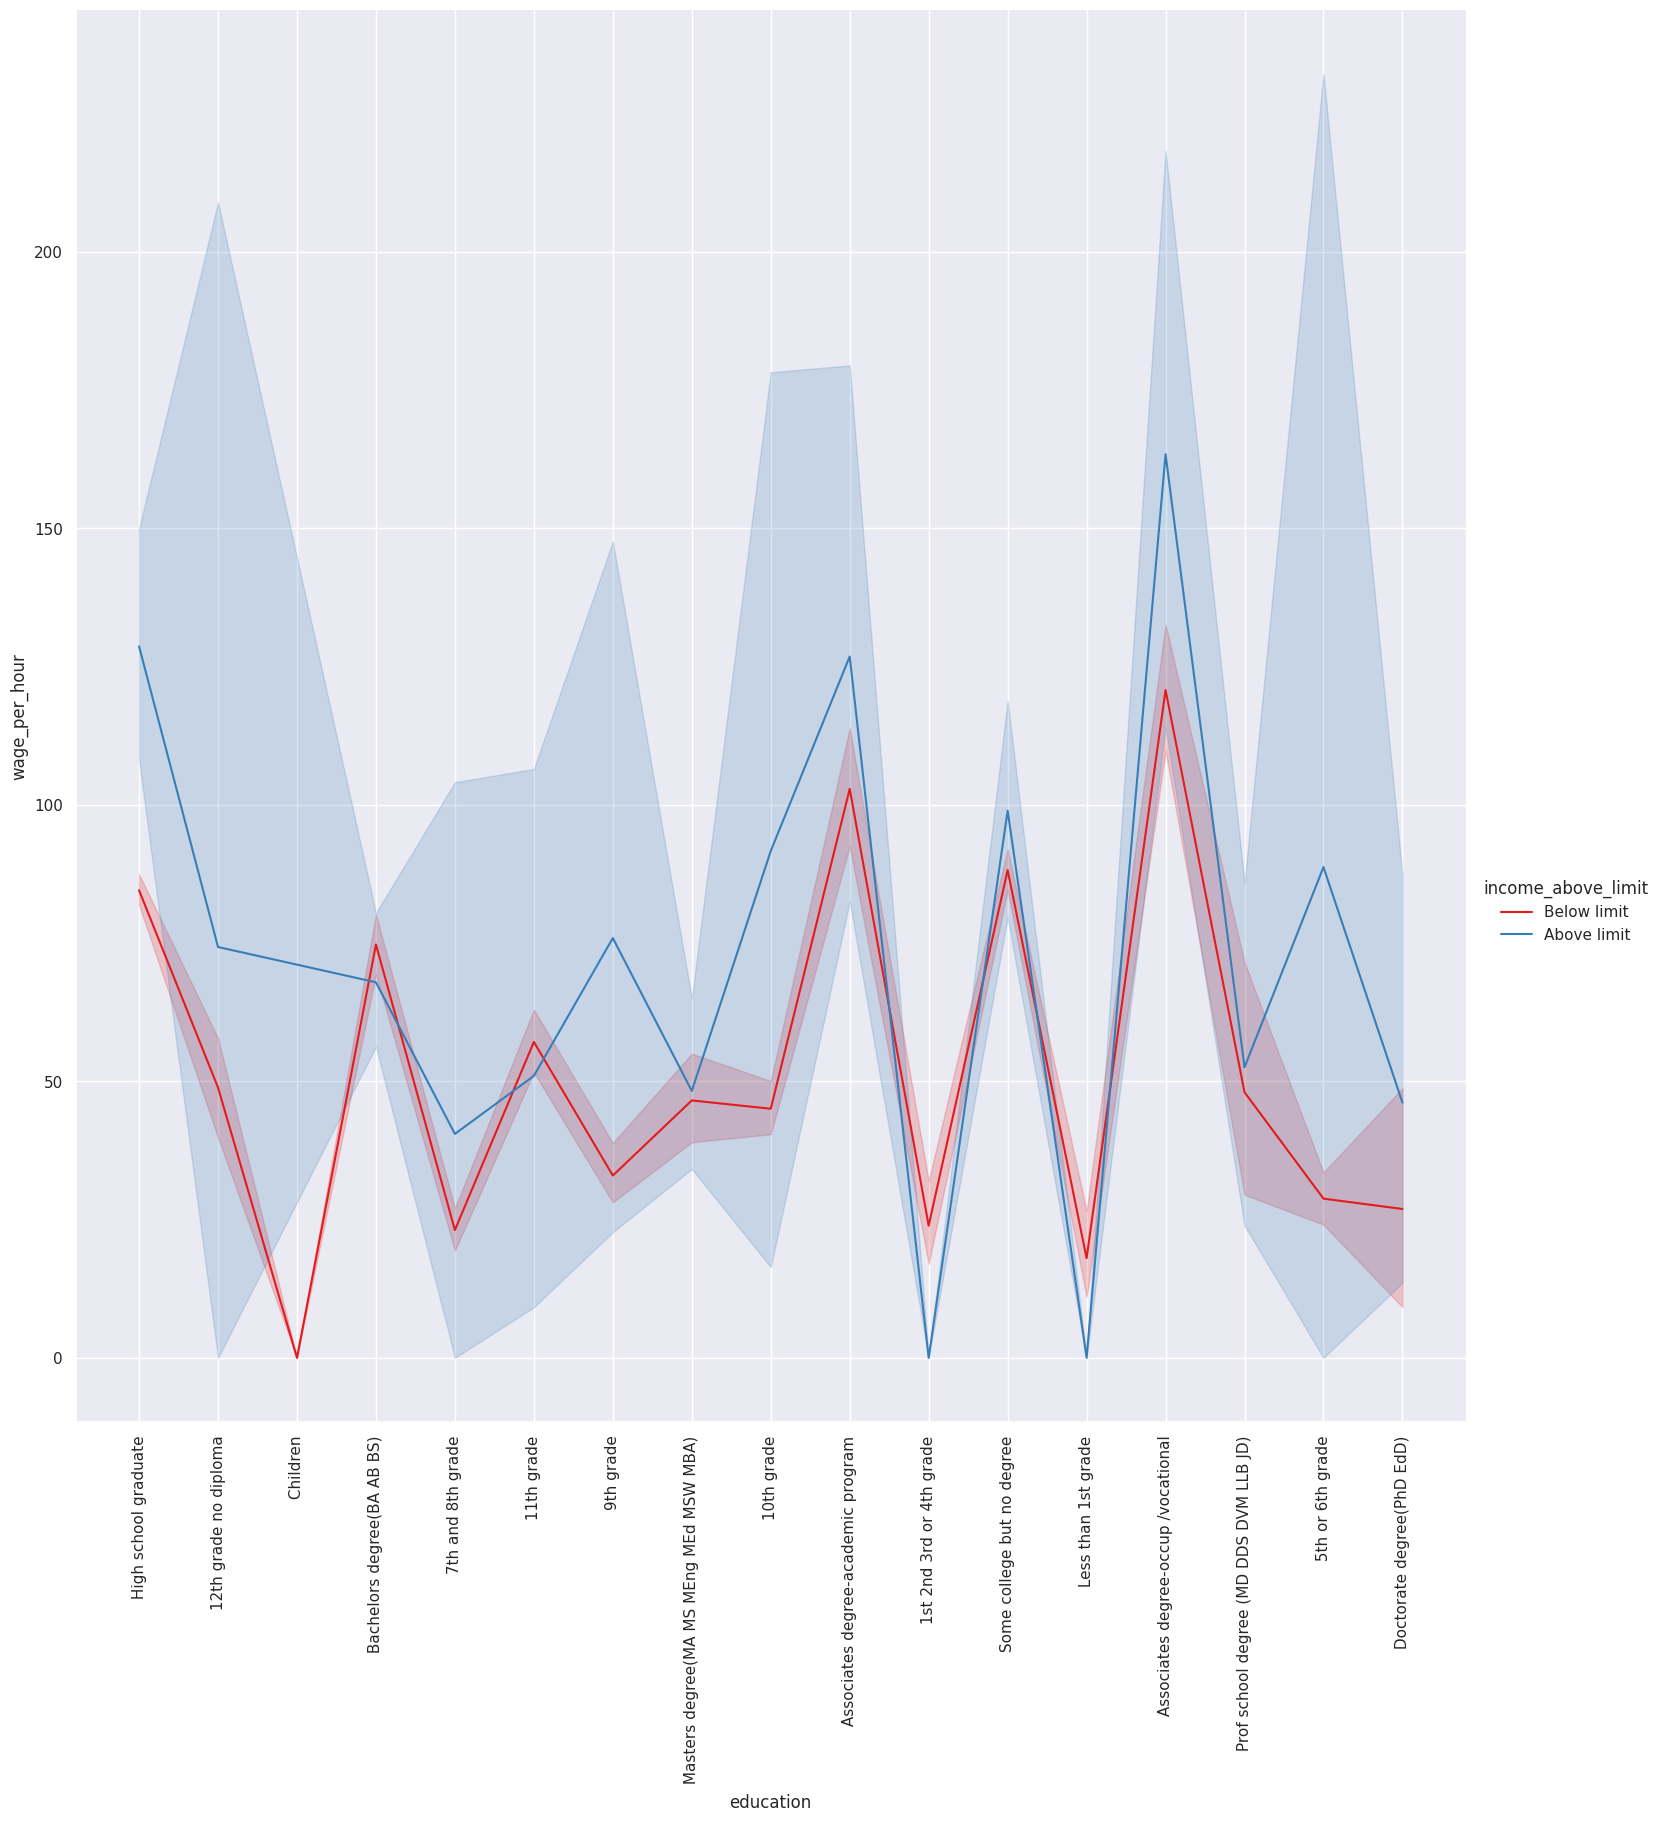

In [ ]:
sns.set(font_scale=1)
chart = sns.relplot(data=df, x="education", hue="income_above_limit", y="wage_per_hour", kind="line", legend="full",height=15, palette='Set1')
chart.set_xticklabels( rotation=90)
#plt.show()

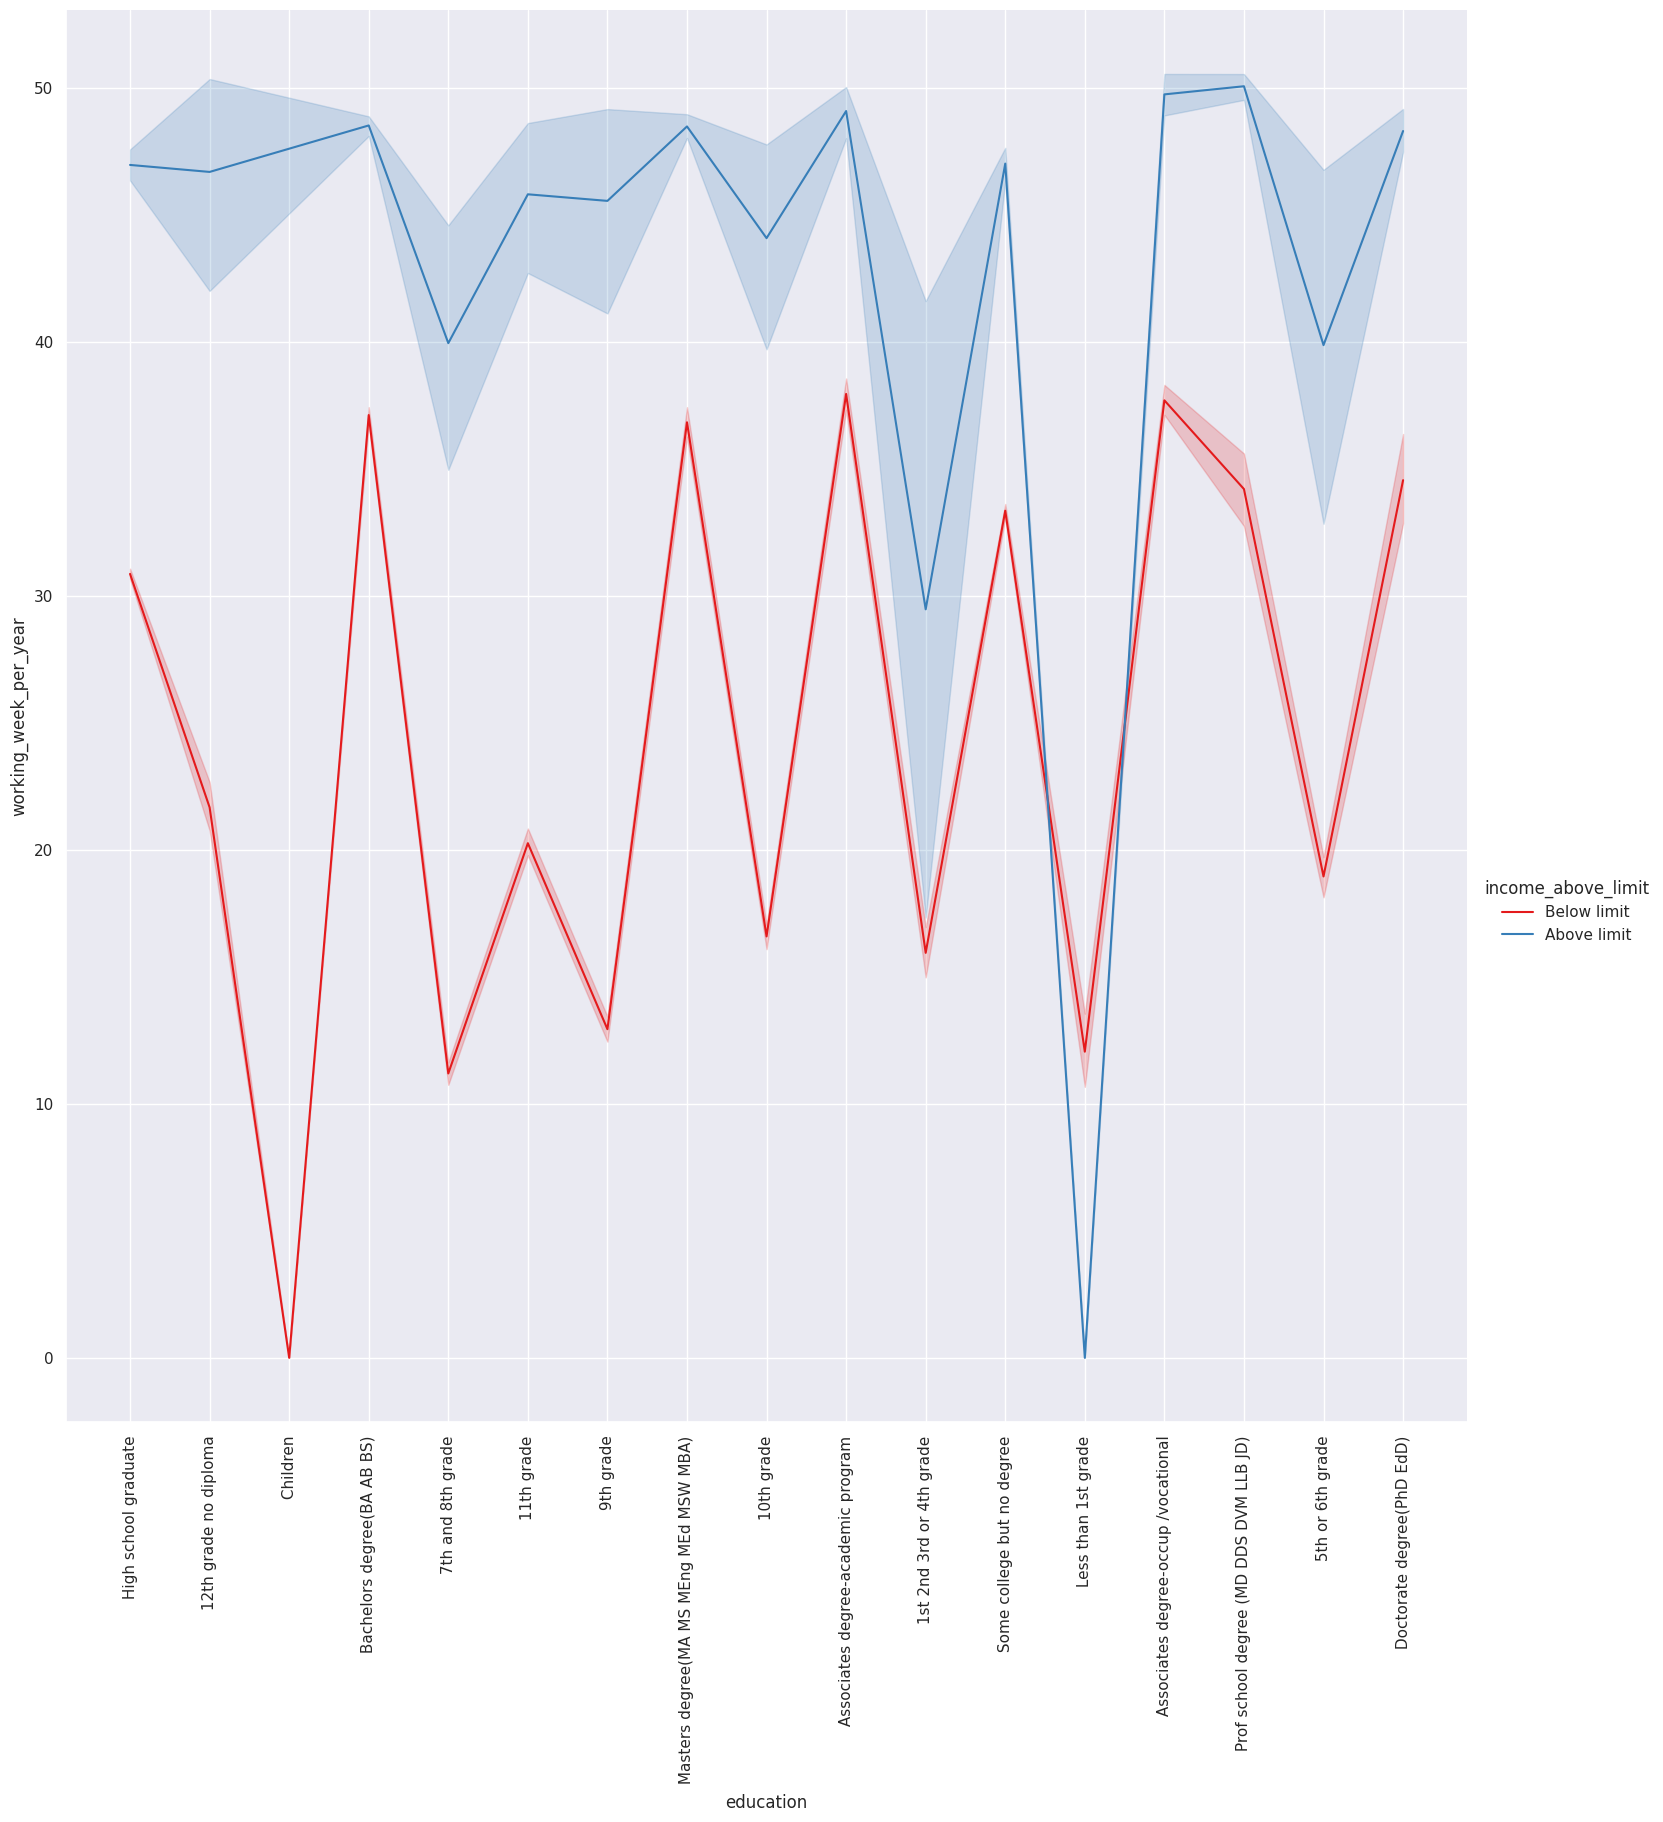

In [ ]:
sns.set(font_scale=1)
chart = sns.relplot(data=df, x="education", hue="income_above_limit", y="working_week_per_year", kind="line", legend="full",height=15, palette='Set1')
chart.set_xticklabels( rotation=90)
#plt.show()

<hr/>
<h3 align="center" style="background-color:white; color:Brown;"> 🛠️ Pre-processing 🛠️</h3>
<hr/>

* Let's check the columns with more than 50% of null values and their impact on income_above_limit

In [ ]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                        0.57 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      99.01 %
vet_benefit                       

In [ ]:
colnames = df.isna().sum()/len(df)
highnull_cols = list(colnames[colnames.values>=0.7].index)
print(highnull_cols)

['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


* Removing columns with more than 70 % of null values

In [ ]:
df.drop(columns = highnull_cols,axis=1,inplace=True)
df.shape

(209499, 34)

In [ ]:
with open('/content/drive/My Drive/Data/df.joblib', 'wb') as f:
    joblib.dump(df,f,compress=3)

----
----

In [ ]:
with open('/content/drive/My Drive/Data/df.joblib', 'r') as f:
  df = joblib.load('/content/drive/My Drive/Data/df.joblib')

In [ ]:
df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

##### Imputing null values


* Label Encoding the categorical variables for smooth data imputing

In [ ]:
temp = df.copy()
temp.head(5)

age   gender               education                class  \
0   79   Female    High school graduate                  NaN   
1   65   Female    High school graduate                  NaN   
2   21     Male   12th grade no diploma   Federal government   
3    2   Female                Children                  NaN   
4   70     Male    High school graduate                  NaN   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  ...  mig_year  \
0         Not in labor force                0              0  ...        95   
1   Children or Armed Forces                0              0  ...        94   
2   Children or Armed Forces                0            500  ...        94   
3   Children or Armed Forces                0              0  ...        94   
4         Not in labor force                0              0  ...        95   

   country_of_birth_own country_of_birth_father  country_of_birth_mother  \
0                    US                      US                       US   
1                    US                      US                       US   
2                    US                      US                       US   
3                    US                   India                    India   
4                    US                      US                       US   

  migration_code_change_in_msa  migration_code_move_within_reg  \
0                          NaN                             NaN   
1                    unchanged                       unchanged   
2                    unchanged                       unchanged   
3                    unchanged                       unchanged   
4                          NaN                             NaN   

  migration_code_change_in_reg residence_1_year_ago  importance_of_record  \
0                          NaN                  NaN               1779.74   
1                    unchanged                 Same               2366.75   
2                    unchanged                 Same               1693.42   
3                    unchanged                 Same               1380.27   
4                          NaN                  NaN               1580.79   

  income_above_limit  
0        Below limit  
1        Below limit  
2        Below limit  
3        Below limit  
4        Below limit  

[5 rows x 34 columns]

In [ ]:
feature_names= df.columns
cols = df.loc[:, df.columns.isin(df.select_dtypes(include='object'))].columns
print(list(cols))
df.tail(5)


['gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'occupation_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'income_above_limit']


age   gender                    education              class  \
209494   16   Female            7th and 8th grade                NaN   
209495   78     Male   Bachelors degree(BA AB BS)                NaN   
209496    8   Female                     Children                NaN   
209497   26   Female   Some college but no degree            Private   
209498   19     Male                   11th grade   Local government   

                          marital_status    race is_hispanic  \
209494                     Never married   White   All other   
209495   Married-civilian spouse present   White   All other   
209496                     Never married   White   All other   
209497   Married-civilian spouse present   White   All other   
209498                     Never married   Black   All other   

            employment_commitment  employment_stat  wage_per_hour  ...  \
209494         Not in labor force                0              0  ...   
209495         Not in labor force                0              0  ...   
209496   Children or Armed Forces                0              0  ...   
209497   Children or Armed Forces                0            700  ...   
209498   Children or Armed Forces                0              0  ...   

        mig_year  country_of_birth_own country_of_birth_father  \
209494        95                    US                      US   
209495        95                    US                      US   
209496        95                    US                      US   
209497        94                    US                      US   
209498        94                    US                      US   

        country_of_birth_mother migration_code_change_in_msa  \
209494                       US                          NaN   
209495                   Canada                          NaN   
209496                       US                          NaN   
209497                       US                    unchanged   
209498                       US                   MSA to MSA   

        migration_code_move_within_reg migration_code_change_in_reg  \
209494                             NaN                          NaN   
209495                             NaN                          NaN   
209496                             NaN                          NaN   
209497                       unchanged                    unchanged   
209498                     Same county                  Same county   

       residence_1_year_ago  importance_of_record income_above_limit  
209494                  NaN               2170.60        Below limit  
209495                  NaN               1029.57        Below limit  
209496                  NaN                791.61        Below limit  
209497                 Same               3530.26        Below limit  
209498                   No               1987.72        Below limit  

[5 rows x 34 columns]

In [ ]:
lbl_encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=3)
df = lbl_encoder.fit_transform(df)


imputed_nos = pd.DataFrame(imputer.fit_transform(df),columns = feature_names)

In [ ]:
with open('/content/drive/My Drive/Data/imputed_nos.joblib', "wb") as f:
  joblib.dump(imputed_nos, f, compress=3)
with open('/content/drive/My Drive/Models/encoder.pickle', "wb") as f:
  pickle.dump(lbl_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)

----
----

In [ ]:
with open('/content/drive/My Drive/Data/imputed_nos.joblib', "r") as f:
  iimputed_nos = joblib.load('/content/drive/My Drive/Data/imputed_nos.joblib')
with open('/content/drive/My Drive/Models/encoder.pickle', "rb") as f:
  eencoder = pickle.load(f)

In [ ]:
imputed_nos.shape

(209499, 34)

In [ ]:

imputed_df = pd.DataFrame(lbl_encoder.inverse_transform(imputed_nos),columns = feature_names)
imputed_df.tail(5)

age   gender                    education              class  \
209494  16   Female            7th and 8th grade       Never worked   
209495  78     Male   Bachelors degree(BA AB BS)            Private   
209496   8   Female                     Children            Private   
209497  26   Female   Some college but no degree            Private   
209498  19     Male                   11th grade   Local government   

                          marital_status    race is_hispanic  \
209494                     Never married   White   All other   
209495   Married-civilian spouse present   White   All other   
209496                     Never married   White   All other   
209497   Married-civilian spouse present   White   All other   
209498                     Never married   Black   All other   

            employment_commitment employment_stat wage_per_hour  ... mig_year  \
209494         Not in labor force               0             0  ...       95   
209495         Not in labor force               0             0  ...       95   
209496   Children or Armed Forces               0             0  ...       95   
209497   Children or Armed Forces               0           700  ...       94   
209498   Children or Armed Forces               0             0  ...       94   

       country_of_birth_own country_of_birth_father country_of_birth_mother  \
209494                   US                      US                      US   
209495                   US                      US                  Canada   
209496                   US                      US                      US   
209497                   US                      US                      US   
209498                   US                      US                      US   

       migration_code_change_in_msa migration_code_move_within_reg  \
209494             NonMSA to nonMSA                    Same county   
209495                    unchanged                      unchanged   
209496                    unchanged                      unchanged   
209497                    unchanged                      unchanged   
209498                   MSA to MSA                    Same county   

       migration_code_change_in_reg residence_1_year_ago importance_of_record  \
209494                  Same county                   No               2170.6   
209495                    unchanged                 Same              1029.57   
209496                    unchanged                 Same               791.61   
209497                    unchanged                 Same              3530.26   
209498                  Same county                   No              1987.72   

       income_above_limit  
209494        Below limit  
209495        Below limit  
209496        Below limit  
209497        Below limit  
209498        Below limit  

[5 rows x 34 columns]

In [ ]:
with open('/content/drive/My Drive/Data/imputed_df.joblib', "wb") as f:
  joblib.dump(imputed_df, f, compress=3)

<Axes: >

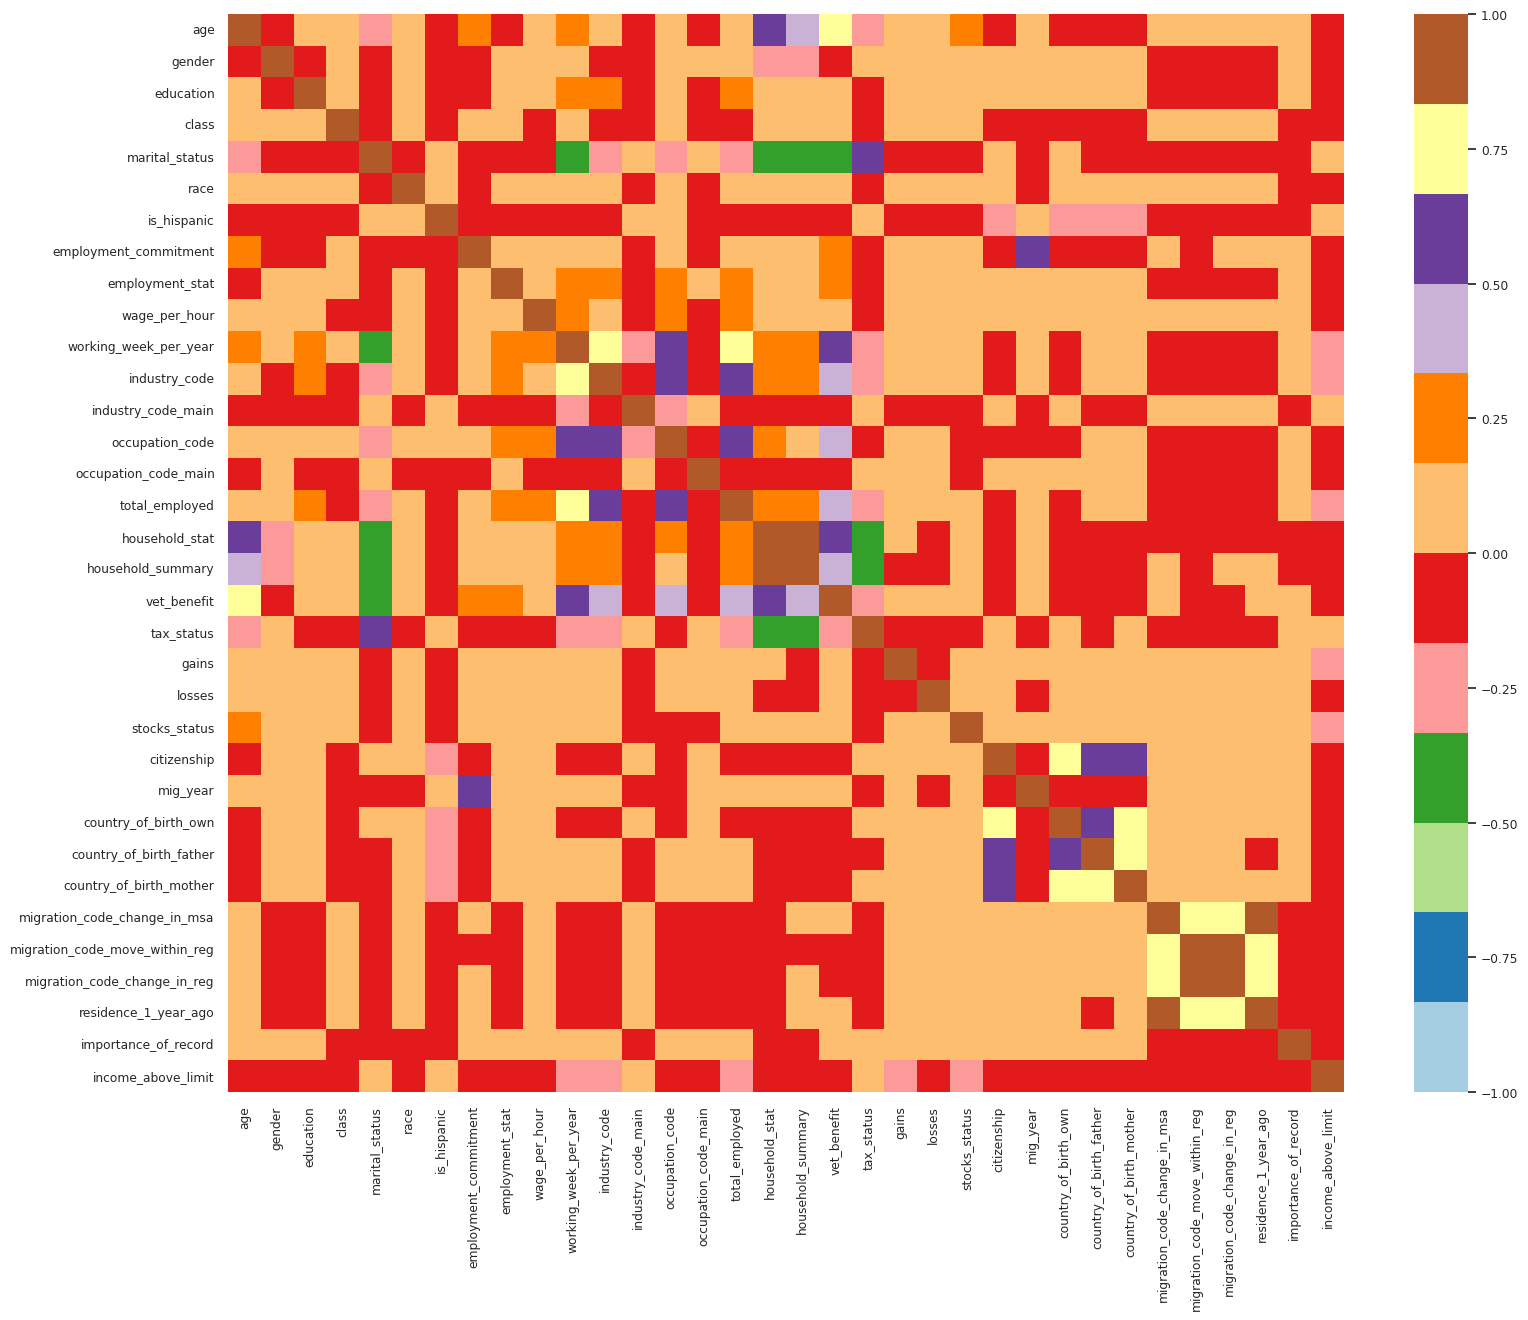

In [ ]:
plt.figure(figsize=(18,14))
sns.set(font_scale=0.8)
sns.heatmap(imputed_nos.corr(), vmin=-1, annot=False, cmap='Paired')

* Separating target variable

In [ ]:
Feature=imputed_nos.drop(columns=['income_above_limit'], axis=1)
y=imputed_nos['income_above_limit']
Feature.head()

age  gender  education     class  marital_status  race  is_hispanic  \
0  79.0     0.0       12.0  3.333333             6.0   4.0          0.0   
1  65.0     0.0       12.0  3.000000             6.0   4.0          0.0   
2  21.0     1.0        2.0  0.000000             4.0   2.0          0.0   
3   2.0     0.0       10.0  3.000000             4.0   1.0          0.0   
4  70.0     1.0       12.0  3.666667             2.0   4.0          0.0   

   employment_commitment  employment_stat  wage_per_hour  ...  citizenship  \
0                    2.0              0.0            0.0  ...          4.0   
1                    0.0              0.0            0.0  ...          4.0   
2                    0.0              0.0          102.0  ...          4.0   
3                    0.0              0.0            0.0  ...          4.0   
4                    2.0              0.0            0.0  ...          4.0   

   mig_year  country_of_birth_own  country_of_birth_father  \
0       1.0                  41.0                     41.0   
1       0.0                  41.0                     41.0   
2       0.0                  41.0                     41.0   
3       0.0                  41.0                     18.0   
4       1.0                  41.0                     41.0   

   country_of_birth_mother  migration_code_change_in_msa  \
0                     41.0                      7.000000   
1                     41.0                      7.000000   
2                     41.0                      7.000000   
3                     18.0                      7.000000   
4                     41.0                      6.333333   

   migration_code_move_within_reg  migration_code_change_in_reg  \
0                        7.000000                      6.000000   
1                        7.000000                      6.000000   
2                        7.000000                      6.000000   
3                        7.000000                      6.000000   
4                        6.666667                      5.666667   

   residence_1_year_ago  importance_of_record  
0              1.000000               55690.0  
1              1.000000               76194.0  
2              1.000000               51881.0  
3              1.000000               39247.0  
4              0.666667               47108.0  

[5 rows x 33 columns]

##### Feature Selection using chi-square method

In [ ]:
chi2_selector = SelectKBest(chi2, k=12)
X_kbest = chi2_selector.fit_transform(Feature, y)
print('Original number of features:', imputed_nos.shape)
print('Reduced number of features:', X_kbest.shape)

cols_idxs = chi2_selector.get_support(indices=True)
features_new = Feature.iloc[:,cols_idxs]
print(features_new)

Original number of features: (209499, 34)
Reduced number of features: (209499, 12)
         age  education  is_hispanic  wage_per_hour  working_week_per_year  \
0       79.0       12.0          0.0            0.0                   52.0   
1       65.0       12.0          0.0            0.0                    0.0   
2       21.0        2.0          0.0          102.0                   15.0   
3        2.0       10.0          0.0            0.0                    0.0   
4       70.0       12.0          0.0            0.0                    0.0   
...      ...        ...          ...            ...                    ...   
209494  16.0        5.0          0.0            0.0                    0.0   
209495  78.0        9.0          0.0            0.0                    0.0   
209496   8.0       10.0          0.0            0.0                    0.0   
209497  26.0       16.0          0.0          247.0                   52.0   
209498  19.0        1.0          0.0            0.0        

In [ ]:
feature_names = features_new.columns
print(feature_names)

Index(['age', 'education', 'is_hispanic', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'total_employed',
       'household_stat', 'gains', 'losses', 'stocks_status',
       'importance_of_record'],
      dtype='object')


#### Splitting dataset into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( features_new, y, test_size=0.2, random_state=42)

##### Upsampling imbalanced data using SMOTE

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("Upsampled shape: ", X_train.shape)

Upsampled shape:  (314446, 12)


In [ ]:
with open('/content/drive/My Drive/Data/X_train.joblib', 'wb') as a:
    joblib.dump(X_train,a,compress=3)
with open('/content/drive/My Drive/Data/X_test.joblib', 'wb') as b:
    joblib.dump(X_test,b,compress=3)
with open('/content/drive/My Drive/Data/y_train.joblib', 'wb') as c:
    joblib.dump(y_train,c,compress=3)
with open('/content/drive/My Drive/Data/y_test.joblib', 'wb') as d:
    joblib.dump(y_test,d,compress=3)

<hr/>
<h3 align="center" style="background-color:white; color:Purple;"> 🏗️ Baseline Modelling 🏗️</h3>
<hr/>

----
----

In [3]:
with open('/content/drive/My Drive/Data/X_train.joblib', 'r') as f:
    X_train=joblib.load('/content/drive/My Drive/Data/X_train.joblib')
f.close()
with open('/content/drive/My Drive/Data/X_test.joblib', 'r') as f:
    X_test=joblib.load('/content/drive/My Drive/Data/X_test.joblib')
f.close()
with open('/content/drive/My Drive/Data/y_train.joblib', 'r') as f:
    y_train=joblib.load('/content/drive/My Drive/Data/y_train.joblib')
f.close()
with open('/content/drive/My Drive/Data/y_test.joblib', 'r') as f:
    y_test=joblib.load('/content/drive/My Drive/Data/y_test.joblib')
f.close()

In [ ]:


def trial_models(X_train,y_train,X_test, y_test):
  models =[]

  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, lr.predict(X_train), average='weighted')
  print('======================')
  print('Trained LR f1-score {}'.format(train_f1))
  print('Test LR f1-score {}'.format(f1))
  print('LR Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))

  models.append(lr)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.accuracy_score(y_train, rf.predict(X_train))
  print('======================')
  print('Trained RF f1-score {}'.format(train_f1))
  print('Test RF f1-score {}'.format(f1))
  print('RF Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(rf)

  #clf = SVC(random_state=0)
  #clf.fit(X_train, y_train)
  #pred = clf.predict(X_test)
  #f1 = metrics.f1_score(y_test, pred, average='weighted')
  #train_f1 = metrics.f1_score(y_train, clf.predict(X_train), average='weighted')
  #print('======================')
  #print('Trained SVC f1-score {}'.format(train_f1))
  #print('Test SVC f1-score {}'.format(f1))
  #print('SVC Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  #models.append(clf)


  gbc = GradientBoostingClassifier(random_state=0)
  gbc.fit(X_train, y_train)
  pred = gbc.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, gbc.predict(X_train), average='weighted')
  print('======================')
  print('Trained GBC f1-score {}'.format(train_f1))
  print('Test GBC f1-score {}'.format(f1))
  print('GBC Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(gbc)

  extree = ExtraTreesClassifier()
  extree.fit(X_train, y_train)
  y_pred = extree.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, extree.predict(X_train), average='weighted')
  print('======================')
  print('Trained ExTree f1-score {}'.format(train_f1))
  print('Test ExTree f1-score {}'.format(f1))
  print('ExTree Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(extree)

  return models

In [ ]:
models = trial_models(X_train,y_train,X_test, y_test)

Trained LR f1-score 0.771172082262243
Test LR f1-score 0.7802789634032912
LR Accuracy 0.7040095465393795
Trained RF f1-score 0.9999904594111548
Test RF f1-score 0.9437308274691465
RF Accuracy 0.9457040572792362
Trained GBC f1-score 0.9562880170459749
Test GBC f1-score 0.9388651405478489
GBC Accuracy 0.9362529832935561
Trained ExTree f1-score 0.9999968198037182
Test ExTree f1-score 0.9388651405478489
ExTree Accuracy 0.9362529832935561


In [ ]:
print(models[3])
models[3].get_params()

ExtraTreesClassifier()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
with open("/content/drive/My Drive/Models/models.pickle", "wb") as f:
            pickle.dump(models, f, protocol=pickle.HIGHEST_PROTOCOL)

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">Selecting Random Forest, ExTree and GRadient Boosting classifier for further hyper-tuning after comparing its performances.</span></div>

<hr/>
<h3 align="center" style="color:DarkBlue;"> 🪛 Hyper-parameter Tuning 🪛</h3>
<hr/>

In [ ]:
skf = KFold(n_splits=5, shuffle=True, random_state=9)

##### Random Forest Classier

In [ ]:

rf = RandomForestClassifier()
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
pred_rf = grid_rf.predict(X_test)
f1 = metrics.f1_score(y_test, pred_rf, average='weighted')
print('Random Forest Classifier parameters are {}'.format(grid_rf.best_params_))
print('Best f1-weighted score {}'.format(grid_rf.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Classifier parameters are {'n_estimators': 107}
Best f1-weighted score 0.9706014752295065
F1_test set is 0.9446610771631846


##### Extree Classifier

In [ ]:
ext = ExtraTreesClassifier()
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)]}
grid_ext = GridSearchCV(estimator = ext, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_ext.fit(X_train, y_train)
pred_ext = grid_ext.predict(X_test)
f1 = metrics.f1_score(y_test, pred_ext, average='weighted')
print('ExTrees Classifier parameters are {}'.format(grid_ext.best_params_))
print('Best f1-weighted score {}'.format(grid_ext.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ExTrees Classifier parameters are {'n_estimators': 113}
Best f1-weighted score 0.9689256230501023
F1_test set is 0.9392165443180828


##### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)]}
grid_gbc = GridSearchCV(estimator = gbc, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_gbc.fit(X_train, y_train)
pred_gbc = grid_gbc.predict(X_test)
f1 = metrics.f1_score(y_test, pred_gbc, average='weighted')
print('Gradient Boosting Classifier parameters are {}'.format(grid_gbc.best_params_))
print('Best f1-weighted score {}'.format(grid_gbc.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Gradient Boosting Classifier parameters are {'n_estimators': 120}
Best f1-weighted score 0.9589077168283403
F1_test set is 0.9410285717200833


In [ ]:
acc_rf = metrics.accuracy_score(y_test, pred_rf)
print('RF Accuracy is {}'.format(acc_rf))
acc_ext = metrics.accuracy_score(y_test, pred_ext)
print('ExTree Accuracy is {}'.format(acc_ext))
acc_gbc = metrics.accuracy_score(y_test, pred_gbc)
print('Gradient Boosting Accuracy is {}'.format(acc_gbc))

RF Accuracy is 0.9469212410501193
ExTree Accuracy is 0.9388782816229116
Gradient Boosting Accuracy is 0.939689737470167


In [ ]:
c_rf = metrics.confusion_matrix(y_test, pred_rf)
print('RF confusion_matrix\n' ,(c_rf))
c_ext = metrics.confusion_matrix(y_test, pred_ext)
print('ExTree confusion_matrix\n',(c_ext))
c_gbc = metrics.confusion_matrix(y_test, pred_gbc)
print('Gradient Boosting confusion_matrix\n',(c_gbc))

RF confusion_matrix
 [[ 1292  1330]
 [  894 38384]]
ExTree confusion_matrix
 [[ 1373  1249]
 [ 1312 37966]]
Gradient Boosting confusion_matrix
 [[ 1490  1132]
 [ 1395 37883]]


<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">After comparing the accuracy, F1-score and the confusion matrix, its concluded that even though the current RF model is over-fitting, Rf model learns in a more generic way both on train and test data.Hence, we can restrain its learning and avoid over-fitting.</span>
</div>


In [ ]:
print('Random Forest Test dataset Accuracy is {}'.format(acc_rf))

Random Forest Accuracy is 0.9469212410501193


<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">Going ahead with RF Classifier for further hyper-tuning on n_estimators and max_depth parameters.</span>
</div>

In [ ]:
skf = KFold(n_splits=5, shuffle=True, random_state=9)

rff = RandomForestClassifier()
params={'n_estimators': [int(x) for x in np.linspace(start = 15, stop = 35, num = 20)]}
grid_rff = GridSearchCV(estimator = rff, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rff.fit(X_train, y_train)
pred_rff = grid_rff.predict(X_test)
f1 = metrics.f1_score(y_test, pred_rff, average='weighted')
print('Random Forest Classifier parameters are {}'.format(grid_rff.best_params_))
print('Best f1-weighted score {}'.format(grid_rff.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Classifier parameters are {'n_estimators': 35}
Best f1-weighted score 0.9695489471969296
F1_test set is 0.9426697273948605


<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">Plotting the learning curve for both the hyper-parameters to avoid over-fitting.</span>
</div>

In [8]:
from matplotlib      import pyplot as plt
from IPython.display import display
import pandas as pd

def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'n_estimators': 35}
best score:      0.96955 (+/-0.00067)
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 35,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19      37.901644      2.628406         0.688367        0.078367   
18      36.293809      1.718921         0.740549        0.091639   
14      31.389607      1.091990         0.728121        0.177786   
6       23.138895      1.032616         0.607215        0.205190   
16      35.070468      0.968828         0.807582        0.230995   
12      29.299997      1.383895         0.625689        0.174804   
17      34.088734      0.785423         0.859595        0.287398   
15      32.910787      1.197942         0.643240        0.053867   
13      30.850797      1.738230         0.558968        0.008741   
10      27.567784      1.813935         0.611030        0.198673   
8       25.431833      1.537226         0.569453        0.183041   
4       21.518733      2.739317         0.406209        0.014240   
9       25.624275      0.951924         0.522661        0.039286   
11      27.522030      0.651719         0.716964        0.230416   
5       21.258512      0.915641         0.494015        0.146274   

   param_n_estimators                params  split0_test_score  \
19                 35  {'n_estimators': 35}           0.968834   
18                 33  {'n_estimators': 33}           0.968866   
14                 29  {'n_estimators': 29}           0.969024   
6                  21  {'n_estimators': 21}           0.968373   
16                 31  {'n_estimators': 31}           0.968659   
12                 27  {'n_estimators': 27}           0.968436   
17                 32  {'n_estimators': 32}           0.969057   
15                 30  {'n_estimators': 30}           0.968182   
13                 28  {'n_estimators': 28}           0.969009   
10                 25  {'n_estimators': 25}           0.968580   
8                  23  {'n_estimators': 23}           0.967991   
4                  19  {'n_estimators': 19}           0.967912   
9                  24  {'n_estimators': 24}           0.968071   
11                 26  {'n_estimators': 26}           0.968373   
5                  20  {'n_estimators': 20}           0.967960   

    split1_test_score  split2_test_score  split3_test_score  \
19           0.969039           0.969518           0.970757   
18           0.968642           0.969900           0.970996   
14           0.968292           0.969852           0.970582   
6            0.968578           0.969184           0.970551   
16           0.968356           0.969518           0.969867   
12           0.968849           0.969327           0.969772   
17           0.967911           0.968548           0.970408   
15           0.968023           0.970075           0.969517   
13           0.968054           0.969677           0.969724   
10           0.968133           0.969518           0.969580   
8            0.968070           0.969534           0.970169   
4            0.968086           0.968962           0.970423   
9            0.968150           0.968755           0.969708   
11           0.968261           0.968914           0.969247   
5            0.967832           0.968866           0.968834   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
19           0.969596         0.969549        0.000668                1  
18           0.969199         0.969520        0.000851                2  
14           0.969103         0.969371        0.000781                3  
6            0.968992         0.969136        0.000764                4  
16           0.969055         0.969091        0.000550                5  
12           0.969008         0.969078        0.000450                6  
17           0.969231         0.969031        0.000827                7  
15           0.969295         0.969018        0.000791                8  
13           0.968277         0.968948        0.000691                9  
10           0.968706         0.968903        0.000561               10  
8            0.968579         0.968

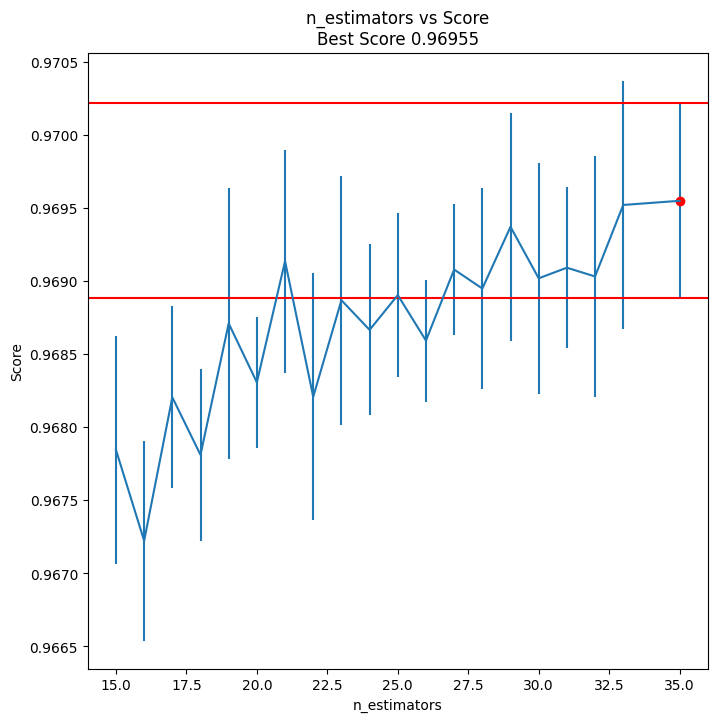

In [ ]:
GridSearch_table_plot(grid_rff, "n_estimators", negative=False)

>1, train: 0.803, test: 0.672
>2, train: 0.848, test: 0.759
>3, train: 0.855, test: 0.768
>4, train: 0.867, test: 0.778
>5, train: 0.879, test: 0.812
>6, train: 0.887, test: 0.817
>7, train: 0.901, test: 0.855
>8, train: 0.904, test: 0.857
>9, train: 0.913, test: 0.862
>10, train: 0.918, test: 0.873
>11, train: 0.923, test: 0.879
>12, train: 0.936, test: 0.893
>13, train: 0.950, test: 0.916
>14, train: 0.951, test: 0.913
>15, train: 0.958, test: 0.923
>16, train: 0.963, test: 0.928
>17, train: 0.966, test: 0.928
>18, train: 0.971, test: 0.933
>19, train: 0.975, test: 0.936
>20, train: 0.978, test: 0.937
>21, train: 0.981, test: 0.941
>22, train: 0.984, test: 0.941
>23, train: 0.985, test: 0.941


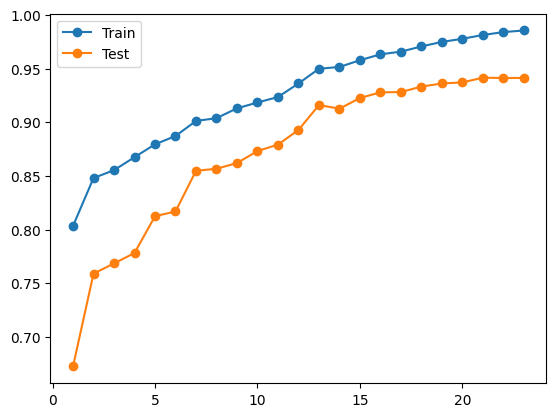

In [6]:
from matplotlib import pyplot
del model
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 24)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = RandomForestClassifier(n_estimators = 22, max_depth =i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = metrics.accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = metrics.accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">
<b><i>13, train: 0.950, test: 0.916</i></b></br></br>
Random forest with estimators = 22 and max_depth = 13 seems like a geniune model without over-fitting.
We plotted the learning curve to prvent the cases of over-fitting</span></div>

<hr/>
<h3 align="center" style="background-color:white; color:Tomato;"> 🏛️ Final Model 🏛️</h3>
<hr/>

In [11]:
final = RandomForestClassifier(n_estimators = 22, max_depth = 13)
final.fit(X_train, y_train)
pred_f = final.predict(X_test)
f1_f = metrics.f1_score(y_test, pred_f, average='weighted')
acc_f = metrics.accuracy_score(y_test, pred_f)
print('Accuracy score(test data) {}'.format(acc_f))
print('F1_test set is {}'.format(f1_f))

Accuracy score(test data) 0.9131980906921241
F1_test set is 0.9230646852637204


In [12]:
final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 22,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
with open('/content/drive/My Drive/Models/final.pickle', 'wb') as f:
    pickle.dump(final, f, protocol=pickle.HIGHEST_PROTOCOL)

----
----

In [6]:
with open('/content/drive/My Drive/Models/final.pickle', 'rb') as f:
    final = pickle.load(f)

<hr/>
<h3 align="center" style="background-color:white; color:DarkPink;"> 🏆 Performance 🏆</h3>
<hr/>

In [14]:
pred_yhat = final.predict(X_train)

In [15]:
print('On Training Data')
print('Accuracy = {}'.format(metrics.accuracy_score(y_train, pred_yhat)))
print('F1-score = {}'.format(metrics.f1_score(y_train, pred_yhat, average='weighted')))

On Training Data
Accuracy = 0.9478988443166713
F1-score = 0.947889972098953


In [16]:
print('On Testing Data')
print('Accuracy = {}'.format(acc_f))
print('F1-score = {}'.format(f1_f))

On Training Data
Accuracy = 0.9131980906921241
F1-score = 0.9230646852637204


<div style="background: #fef5fa; overflow: hidden; width: 85%; height: auto; border: solid gold; border-width: .1px .1em .1em .8em; padding: .2em .6em;">
<span style="color: #333333; font-size:95%;">Above results are on testing data, code cell was updated but didn't dared to run the whole notebook.</span></div>

In [22]:
target=['Above limit', 'Below limit']

print('=== TEST DATA ===')
print(metrics.classification_report(y_test, pred_f,target_names=target))

=== TEST DATA ===
              precision    recall  f1-score   support

 Above limit       0.38      0.64      0.48      2622
 Below limit       0.97      0.93      0.95     39278

    accuracy                           0.91     41900
   macro avg       0.68      0.79      0.72     41900
weighted avg       0.94      0.91      0.92     41900



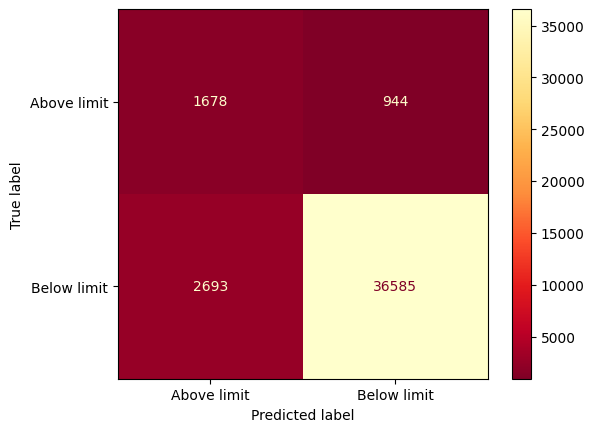

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_f)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target)

cm_display.plot(cmap='YlOrRd_r')
plt.show()


<Axes: >

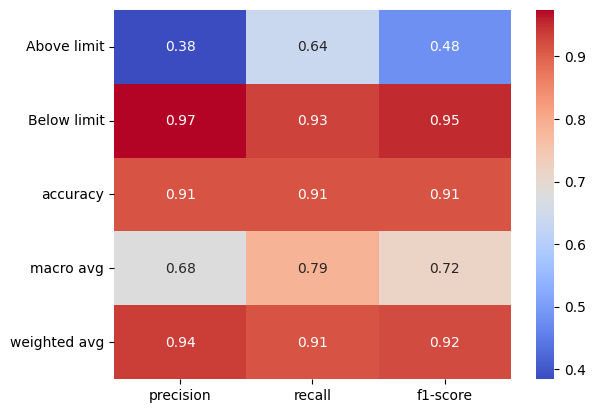

In [49]:
clf_report = metrics.classification_report(y_test, pred_f,output_dict=True,target_names=target)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='coolwarm')

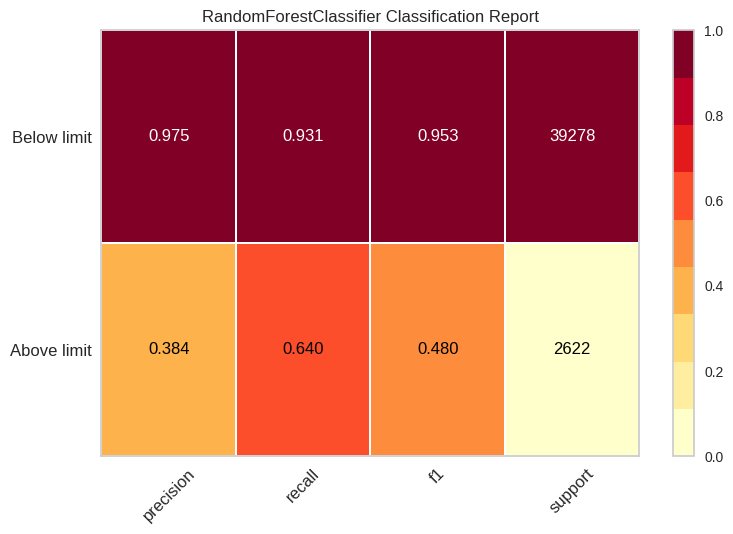

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [50]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(final, classes=target, support=True)


visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [ ]:
output = open('/content/drive/My Drive/Models/final.pickle', 'wb')
pickle.dump(final,output)

<hr/>
<h3 align="center" style="background-color:white; color:Maroon;"> 🏵️ Explainable AI 🏵️</h3>
<hr/>

In [51]:
!pip install shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
features = ['age', 'education', 'is_hispanic', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'total_employed',
       'household_stat', 'gains', 'losses', 'stocks_status',
       'importance_of_record']

In [79]:
X_sample = X_test[100:200]
X_sample

age  education  is_hispanic  wage_per_hour  working_week_per_year  \
9758    50.0       11.0          0.0            0.0                   52.0   
31015   74.0       16.0          0.0            0.0                    0.0   
99519   31.0       12.0          0.0            0.0                   52.0   
50358   57.0        9.0          0.0            0.0                   44.0   
149947  61.0       12.0          0.0            0.0                   52.0   
...      ...        ...          ...            ...                    ...   
118221  28.0       12.0          0.0            0.0                   52.0   
25082   18.0       12.0          0.0            0.0                   52.0   
53208    4.0       10.0          0.0            0.0                    0.0   
119337  36.0       12.0          0.0            0.0                    0.0   
178812  50.0       12.0          0.0            0.0                   52.0   

        industry_code  total_employed  household_stat  gains  losses  \
9758             43.0             6.0            20.0    0.0    55.0   
31015             0.0             0.0            20.0    0.0     0.0   
99519            25.0             3.0             2.0    0.0     0.0   
50358            43.0             3.0            22.0    0.0     0.0   
149947           22.0             4.0            22.0    0.0     0.0   
...               ...             ...             ...    ...     ...   
118221           41.0             6.0            37.0    0.0     0.0   
25082            33.0             1.0             2.0    0.0     0.0   
53208             0.0             0.0             8.0    0.0     0.0   
119337            0.0             0.0            37.0    0.0     0.0   
178812           39.0             4.0            34.0    0.0     0.0   

        stocks_status  importance_of_record  
9758            154.0               60386.0  
31015           976.0               35598.0  
99519             0.0               79100.0  
50358             0.0               36632.0  
149947            0.0               72048.0  
...               ...                   ...  
118221            0.0               80366.0  
25082             0.0               85018.0  
53208             0.0               27497.0  
119337            0.0               46029.0  
178812            0.0               34274.0  

[100 rows x 12 columns]

In [80]:
ytest_sample = pred_f[100:200]
ytest_sample

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [81]:
shap_values = shap.TreeExplainer(final).shap_values(X_sample)

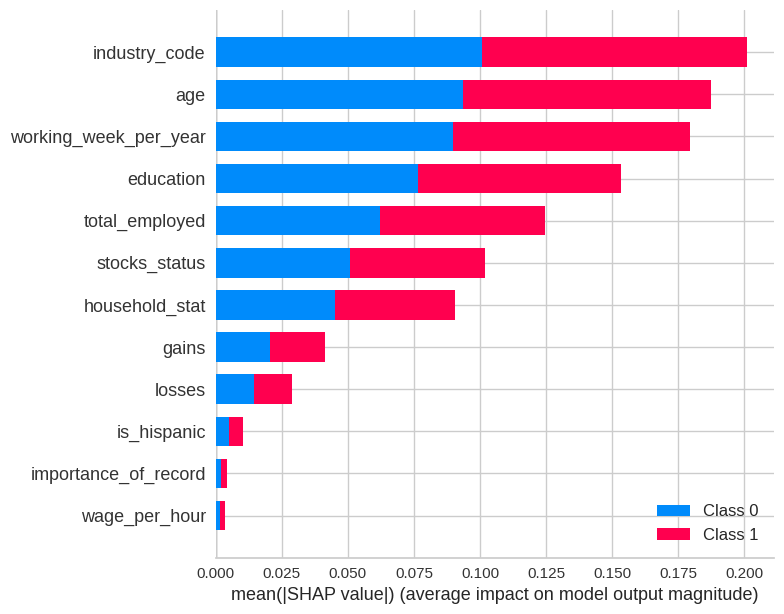

In [82]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [83]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[0][:], X_sample)

In [86]:
shap.initjs()
print(ytest_sample[83])
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[0][83], X_sample.iloc[83])

1.0


In [85]:
shap.initjs()
i=83
print(ytest_sample[i])
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

1.0


1.0


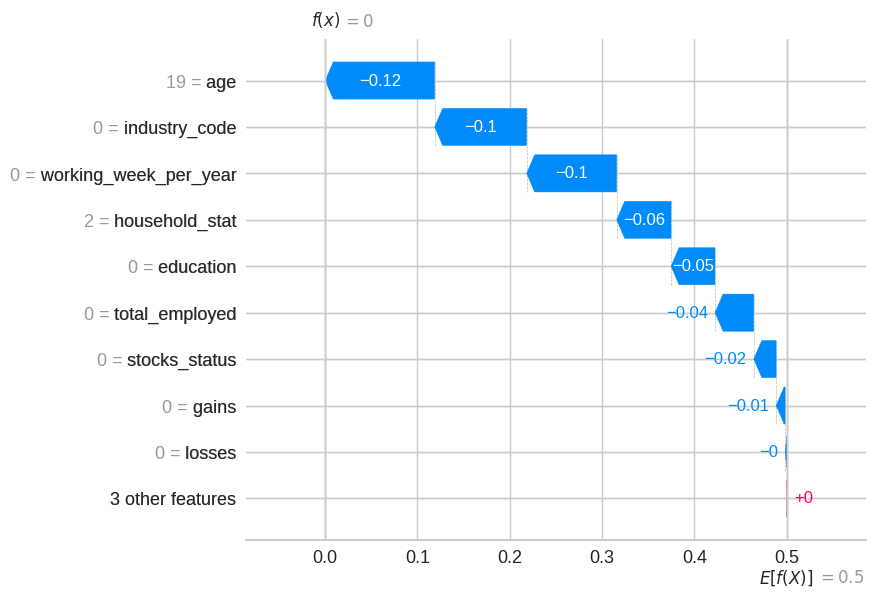

In [87]:
row = 32
print(ytest_sample[row])

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=shap.TreeExplainer(final).expected_value[0], data=X_sample.iloc[row],
                                         feature_names=X_sample.columns.tolist()))

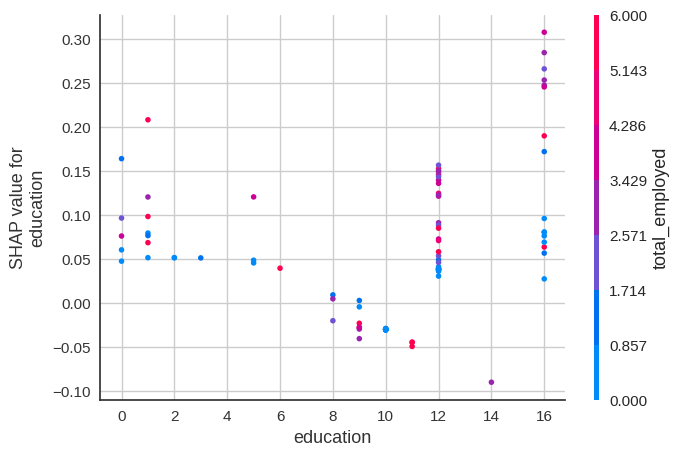

In [90]:
shap.dependence_plot('education', shap_values[1], X_sample)

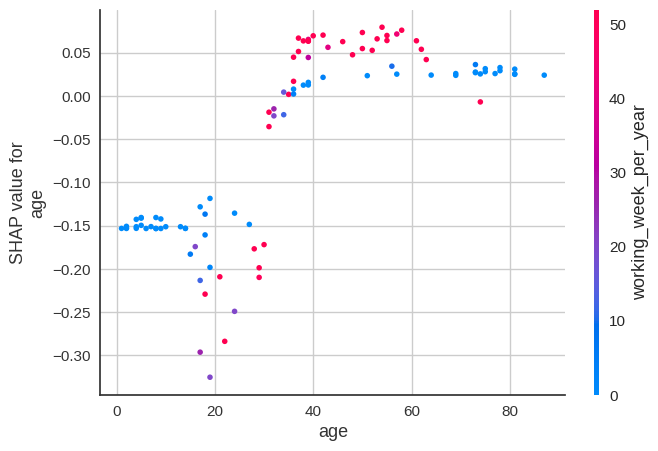

In [92]:
shap.dependence_plot('age', shap_values[0], X_sample)

1.0


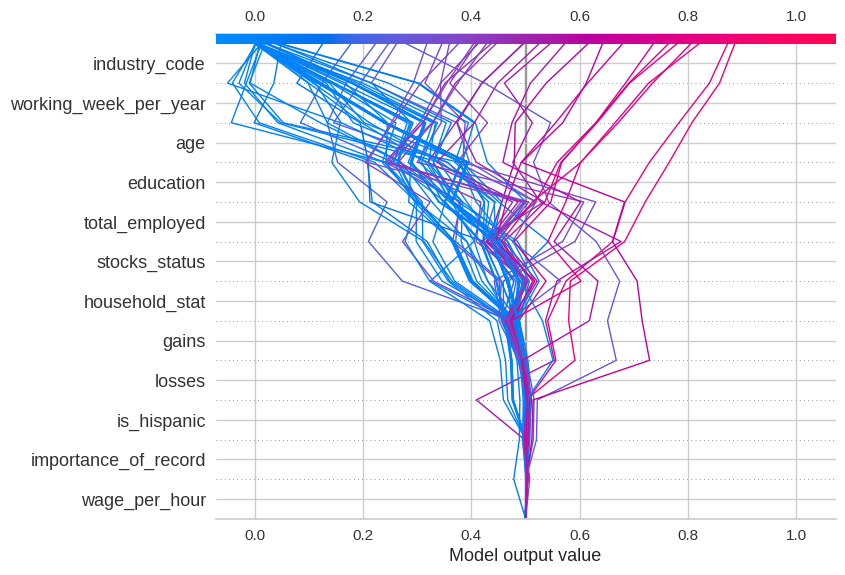

In [94]:
i=83
print(ytest_sample[i])
shap.decision_plot(shap.TreeExplainer(final).expected_value[0],
                   shap_values[0][:i],
                   feature_names=X_sample.columns.tolist())